In [1]:
from google.colab import auth
auth.authenticate_user()

# Read single blob

In [ ]:
# https://console.cloud.google.com/storage/browser/streaminghistory/MyData1;tab=objects?project=spotifydata-431900&pageState=(%22StorageObjectListTable%22:(%22f%22:%22%255B%255D%22))&prefix=&forceOnObjectsSortingFiltering=false

In [365]:
from google.cloud import storage
import pandas as pd
import json

storage_client = storage.Client()

bucket_name = 'streaminghistory'
file_name = 'MyData1/StreamingHistory2.json'

bucket = storage_client.get_bucket(bucket_name)

blob = bucket.blob(file_name)

# Download the blob to a local file
blob.download_to_filename('StreamingHistory2.json')

# Read the local file into a pandas DataFrame
df = pd.read_json('StreamingHistory2.json')

# Print the first few rows of the DataFrame
print(df.head())

            endTime        artistName  \
0  2023-06-14 05:47   The Paper Kites   
1  2023-06-14 05:47        John Prine   
2  2023-06-14 13:17        Noah Kahan   
3  2023-06-14 13:21       Futurebirds   
4  2023-06-14 13:23  The Decemberists   

                                   trackName  msPlayed  
0                        Bloom - Bonus Track    210080  
1  In Spite of Ourselves (feat. Iris DeMent)     15237  
2                          She Calls Me Back    243815  
3                                      Rodeo    233173  
4                           Sons & Daughters    106693  


# Read all blobs in extended streaming history

In [564]:
# Prefix to filter files
prefix = 'MyData2/Streaming_History'
dfs = []
# List blobs (files) in the bucket with the specified prefix
blobs = bucket.list_blobs(prefix=prefix)

# Collect the file names
file_names = [blob.name for blob in blobs]
print(file_names)
for file in file_names:
  print(file)

['MyData2/Streaming_History_Audio_2015-2017_0.json', 'MyData2/Streaming_History_Audio_2017-2018_1.json', 'MyData2/Streaming_History_Audio_2018-2019_3.json', 'MyData2/Streaming_History_Audio_2018_2.json', 'MyData2/Streaming_History_Audio_2019-2020_4.json', 'MyData2/Streaming_History_Audio_2020-2021_6.json', 'MyData2/Streaming_History_Audio_2020_5.json', 'MyData2/Streaming_History_Audio_2021-2022_8.json', 'MyData2/Streaming_History_Audio_2021_7.json', 'MyData2/Streaming_History_Audio_2022-2023_9.json', 'MyData2/Streaming_History_Audio_2023_10.json', 'MyData2/Streaming_History_Video_2016-2023.json']
MyData2/Streaming_History_Audio_2015-2017_0.json
MyData2/Streaming_History_Audio_2017-2018_1.json
MyData2/Streaming_History_Audio_2018-2019_3.json
MyData2/Streaming_History_Audio_2018_2.json
MyData2/Streaming_History_Audio_2019-2020_4.json
MyData2/Streaming_History_Audio_2020-2021_6.json
MyData2/Streaming_History_Audio_2020_5.json
MyData2/Streaming_History_Audio_2021-2022_8.json
MyData2/Stream

In [565]:
for i in range(len(file_names)):
  file_name = file_names[i]
  local_file_name = "StreamingHistory"+str([i][0])+".json"
  #print(local_file_name)
  #print(file_name)
  blob = bucket.blob(file_name)
  blob.download_to_filename(local_file_name)
  df = pd.read_json(local_file_name)
  dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)

# Initial EDA on StreamingHistory

In [566]:
combined_df.describe()

,ms_played,offline_timestamp
count,1.748610e+05,1.747360e+05
mean,1.172049e+05,1.334162e+12
std,1.872463e+05,5.717915e+11
min,0.000000e+00,0.000000e+00
25%,3.157000e+03,1.515091e+12
50%,9.991300e+04,1.562986e+12
75%,2.007360e+05,1.611992e+12
max,1.147092e+07,1.665792e+12


In [567]:
combined_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ms_played,174861.0,1.172049e+05,1.872463e+05,0.0,3.157000e+03,9.991300e+04,2.007360e+05,1.147092e+07
offline_timestamp,174736.0,1.334162e+12,5.717915e+11,0.0,1.515091e+12,1.562986e+12,1.611992e+12,1.665792e+12


In [8]:
combined_df.head(4)

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2015-08-10T14:10:00Z,benjaminkholland,"iOS 8.3 (iPhone7,2)",1020,US,65.78.179.118,unknown,Apollo - Radio Edit,Astronaut,Apollo,...,None,None,None,appload,endplay,True,1.0,0.0,0.0,False
1,2015-08-10T14:18:03Z,benjaminkholland,"iOS 8.3 (iPhone7,2)",1020,US,65.78.179.118,unknown,679 (feat. Remy Boyz),Fetty Wap,679 (feat. Remy Boyz),...,None,None,None,appload,endplay,True,1.0,0.0,0.0,False
2,2015-08-10T14:21:19Z,benjaminkholland,"iOS 8.3 (iPhone7,2)",196693,US,65.78.179.118,unknown,679 (feat. Remy Boyz),Fetty Wap,679 (feat. Remy Boyz),...,None,None,None,clickrow,trackdone,True,0.0,0.0,0.0,False
3,2015-08-18T05:49:20Z,benjaminkholland,"iOS 8.3 (iPhone7,2)",185093,US,65.78.179.118,unknown,Rabbit Hole,The Temper Trap,The Temper Trap,...,None,None,None,trackdone,trackdone,False,0.0,0.0,0.0,False


In [9]:
combined_df.shape

(174861, 21)

In [10]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174861 entries, 0 to 174860
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 174861 non-null  object 
 1   username                           174861 non-null  object 
 2   platform                           174861 non-null  object 
 3   ms_played                          174861 non-null  int64  
 4   conn_country                       174861 non-null  object 
 5   ip_addr_decrypted                  174861 non-null  object 
 6   user_agent_decrypted               173172 non-null  object 
 7   master_metadata_track_name         173967 non-null  object 
 8   master_metadata_album_artist_name  173967 non-null  object 
 9   master_metadata_album_album_name   173967 non-null  object 
 10  spotify_track_uri                  173967 non-null  object 
 11  episode_name                       864 

In [27]:
combined_df.shape
#174861

(174861, 21)

In [6]:
# Evaluate the rows that have the nulls for each value
songs = combined_df[combined_df["episode_name"].isna()]
#173997 (there are 30 without either)
songs = combined_df[combined_df["master_metadata_track_name"].notna()]
#173967
songs.shape

(173967, 21)

In [7]:
pods = combined_df[combined_df["episode_name"].notna()]
#864
pods.shape

(864, 21)

In [8]:
no_song_or_pod = combined_df[combined_df["episode_name"].isna() & combined_df["master_metadata_track_name"].isna()]
no_song_or_pod.shape

(30, 21)

In [633]:
combined_df["incognito_mode"].value_counts()
combined_df[combined_df["incognito_mode"]==True]

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
3734,2017-02-24T22:35:15Z,benjaminkholland,"iOS 10.1 (iPhone9,3)",5373,US,66.60.144.122,unknown,Chapter 1 of 6,Spotify,The Chase,...,None,None,None,clickrow,endplay,False,NaN,0.0,0.000000e+00,True
3735,2017-02-24T22:35:30Z,benjaminkholland,"iOS 10.1 (iPhone9,3)",12389,US,66.60.144.122,unknown,Chapter 1 of 6,Spotify,The Chase,...,None,None,None,clickrow,endplay,False,NaN,0.0,0.000000e+00,True
3796,2017-02-25T19:26:37Z,benjaminkholland,"iOS 10.1 (iPhone9,3)",8693,US,75.53.168.205,unknown,Melody - GO! Running Mix,Oliver Heldens,Melody,...,None,None,None,clickrow,endplay,False,NaN,0.0,0.000000e+00,True
3797,2017-02-25T19:26:43Z,benjaminkholland,"iOS 10.1 (iPhone9,3)",6339,US,75.53.168.205,unknown,Melody - GO! Running Mix,Oliver Heldens,Melody,...,None,None,None,clickrow,fwdbtn,False,NaN,0.0,0.000000e+00,True
3798,2017-02-25T19:27:06Z,benjaminkholland,"iOS 10.1 (iPhone9,3)",5874,US,75.53.168.205,unknown,Portland - Pyrodox GO! Running Remix,Watermät,Portland,...,None,None,None,fwdbtn,endplay,False,NaN,0.0,0.000000e+00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164608,2023-03-20T05:00:28Z,benjaminkholland,ios,1160,US,47.209.35.197,unknown,Amen Omen,Ben Harper,Diamonds On The Inside,...,None,None,None,fwdbtn,fwdbtn,True,True,0.0,1.679288e+09,True
164609,2023-03-20T05:03:07Z,benjaminkholland,ios,159773,US,47.209.35.197,unknown,Someday Soon,Harlem,Hippies,...,None,None,None,fwdbtn,trackdone,True,False,0.0,1.679288e+09,True
172564,2023-07-02T06:48:46Z,benjaminkholland,ios,7936,US,166.199.5.3,unknown,3AM,Matchbox Twenty,Yourself or Someone Like You,...,None,None,None,remote,unknown,True,False,0.0,1.688281e+09,True
172565,2023-07-02T06:48:48Z,benjaminkholland,ios,1343,US,166.199.5.3,unknown,3AM,Matchbox Twenty,Yourself or Someone Like You,...,None,None,None,remote,unknown,True,False,0.0,1.688281e+09,True


In [634]:
combined_df["platform"].value_counts()
len(combined_df["platform"].unique())
combined_df["platform"].unique()
#combined_df[combined_df["platform"]==True]

array(['iOS 8.3 (iPhone7,2)', 'iOS 9.1 (iPhone7,2)',
       'Windows 7 (6.1.7601; x64; SP1; S)',
       'WebPlayer (websocket RFC6455)',
       'Partner amazon_echo Amazon;Echo;;', 'iOS 10.0.2 (iPhone7,2)',
       'iOS 10.1 (iPhone9,3)', 'OS X 10.11.6 [x86 8]',
       'iOS 10.2.1 (iPhone9,3)', 'iOS 10.2.1 (iPhone8,1)',
       'iOS 10.3.1 (iPhone8,1)',
       'Partner ios_sdk Apple;iPhone9.3;1bfd2066b99e4ddbb6c28a761e96c4f9;10.2.1',
       'iOS 10.3.3 (iPhone9,3)',
       'Partner ios_sdk Apple;iPhone9.3;1bfd2066b99e4ddbb6c28a761e96c4f9;10.3.3',
       'iOS 11.1.2 (iPhone9,3)', 'OS X 10.13.4 [x86 8]',
       'Partner ios_sdk Apple;iPhone9.3;1bfd2066b99e4ddbb6c28a761e96c4f9;11.1.2',
       'iOS 12.1.2 (iPhone9,3)',
       'Partner amazon_echo Amazon;Echo;27d4dfe427b34d57995b463e5d63198d;;tpapi',
       'iOS 12.1.4 (iPhone9,3)', 'iOS 12.2 (iPhone9,3)',
       'OS X 10.13.6 [x86 4]', 'OS X 10.14.5 [x86 8]',
       'iOS 11.4.1 (iPhone9,3)', 'iOS 12.1.1 (iPhone9,3)',
       'Partner tizen_tv

In [11]:
# x Top artists
# x Most streamed song
# x Overall stream time (could be different depending on song length)
# x Number of streams per song
# x Number of streams per artist
# Most intentionally played song (not shuffle queued)
# Number of podcasts
# x Most skipped song
# x Most frequently skipped song (weighted for plays)
# Most skipped genre
# x Most skipped artist
# x Most frequently skipped artist (weighted for plays)

# Does genre change based on the platform? ios vs. mac?
  # too vague

# Top genre
# Top sub-genre
# Lowest genre

#### Similar questions for podcasts
#### Similar questions for saved song trends

# Most common songs on playlists


# Rec sys for songs based on ones that I listened to in same session
# Rec sys for songs based on content

# marqueeReachableAudience???

## Songs

In [635]:
# Select ONLY songs
# Evaluate the rows that have the nulls for each value
#songs = combined_df[combined_df["episode_name"].isna()]
#173997 (there are 30 without either)
songs = combined_df[combined_df["master_metadata_track_name"].notna()]
#173967
songs.shape

(173967, 21)

### Top artist & songs by plays

#### Top artists by plays

In [636]:
# Top artists
print("Artist count: "+str(len(songs['master_metadata_album_artist_name'].value_counts())))
print("Top artist")
top_artists = songs['master_metadata_album_artist_name'].value_counts().reset_index().rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name","count":"count_played"})
top_artists.index = top_artists.index + 1
top_artists = top_artists.reset_index(names=["overall_artist_ranking"])
print(top_artists.head())
print("\n")

Artist count: 6594
Top artist
   overall_artist_ranking     Artist_Name  count_played
0                       1      Kanye West          3701
1                       2           Drake          2734
2                       3     Post Malone          2415
3                       4         J. Cole          2164
4                       5  Kendrick Lamar          1958




In [175]:
a = songs['master_metadata_album_artist_name'].value_counts().reset_index().rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name"})
a[a["Artist_Name"]=="Noah Kahan"]

,Artist_Name,count
41,Noah Kahan,662


#### Top songs by plays

In [192]:
# Confirmed that the songs have the same name but different artist
# combined_df[combined_df["master_metadata_track_name"]=="Ghost Town"][["master_metadata_album_artist_name","master_metadata_track_name"]]
# Most streamed song
print("Song count: " +str(len(songs['master_metadata_track_name'].value_counts())))
print("Top song")
#print(songs['master_metadata_track_name'].value_counts().reset_index().head())
# songs.groupby(["master_metadata_track_name","master_metadata_album_artist_name"])["master_metadata_track_name"].agg("count")
# Different values when grouping by artist name. Potentially artist name change?
top_songs = songs.groupby(["master_metadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='count_played').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_played",ascending=False).reset_index(drop=True)
top_songs.index = top_songs.index + 1
top_songs = top_songs.reset_index(names=["overall_song_ranking"])
#top_artists.index = top_artists.index + 1
#top_artists = top_artists
#.reset_index(names=["overall_song_ranking"])
print(top_songs.head())
#print(songs.groupby(["master_me  tadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='counts').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("counts",ascending=False).reset_index(names=["overall_song_ranking"]))#drop=True))
# Sticking with grouping by artist & song name. Sometimes same song can be on different albums. Some songs also have same name.
# songs.groupby(["master_metadata_track_name"]).size().reset_index(name='counts').sort_values("counts",ascending=False)
# 23137, 21264

Song count: 21264
Top song
   overall_song_ranking  Track_Name     Artist_Name  count_played
0                     1    Cardinal         Mt. Joy           172
1                     2     HUMBLE.  Kendrick Lamar           163
2                     3  scapegoats       Baby Keem           161
3                     4  Yes Indeed        Lil Baby           157
4                     5  goosebumps    Travis Scott           148


### Top artist & songs by playtime

#### Top artist by playtime

In [359]:
# Top artists by playtime
#print(combined_df['master_metadata_album_artist_name'].value_counts().head())
artist_playtime = songs.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index().rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("ms_total",ascending=False).reset_index(drop=True)
artist_playtime.index = artist_playtime.index + 1
artist_playtime = artist_playtime.reset_index(names=["playtime_artist_ranking"])

#artist_playtime = songs.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index().rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("ms_total",ascending=False).reset_index(names=["playtime_artist_ranking"])#drop=True)
artist_playtime["min_played"] = artist_playtime["ms_total"]/60000
artist_playtime["hr_played"] = artist_playtime["min_played"]/60
print(artist_playtime.head())
#song_playtime

   playtime_artist_ranking              Artist_Name   ms_total   min_played  \
0                        1               Kanye West  443276214  7387.936900   
1                        2                    Drake  349928847  5832.147450   
2                        3              Post Malone  278284792  4638.079867   
3                        4  Rainbow Kitten Surprise  263096251  4384.937517   
4                        5           Kendrick Lamar  245243844  4087.397400   

    hr_played  
0  123.132282  
1   97.202458  
2   77.301331  
3   73.082292  
4   68.123290  


#### Top songs by playtime

In [194]:
song_playtime = songs.groupby(["master_metadata_track_name","master_metadata_album_artist_name"])['ms_played'].sum().reset_index().rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("ms_total",ascending=False).reset_index(drop=True)
song_playtime.index = song_playtime.index + 1
song_playtime = song_playtime.reset_index(names=["playtime_song_ranking"])#drop=True)
song_playtime["min_played"] = song_playtime["ms_total"]/60000
song_playtime["hr_played"] = song_playtime["min_played"]/60
song_playtime = song_playtime.drop(columns="ms_total")
print(song_playtime.head())

   playtime_song_ranking                       Track_Name  \
0                      1                      First Class   
1                      2                    When It Lands   
2                      3                       Ghost Town   
3                      4                         Cardinal   
4                      5  If You’re Too Shy (Let Me Know)   

               Artist_Name  min_played  hr_played  
0  Rainbow Kitten Surprise  432.213250   7.203554  
1  Rainbow Kitten Surprise  397.305650   6.621761  
2               Kanye West  381.074800   6.351247  
3                  Mt. Joy  368.971400   6.149523  
4                 The 1975  367.822467   6.130374  


### Top skipped artist & songs

In [195]:
# The skipped songs count are weighed by artists I've been listening to more in the last year. This is a questionable stat.
# There are values for 2476 artists
top_skips = songs.groupby(["master_metadata_album_artist_name"])["skipped"].agg("count").reset_index(name="skipped_count").sort_values("skipped_count",ascending=False).reset_index(drop=True)
print(top_skips.head())

  master_metadata_album_artist_name  skipped_count
0                        Noah Kahan            623
1                      Fred again..            464
2                      Taylor Swift            462
3                        Zach Bryan            436
4                             Drake            280


In [196]:
len(songs["reason_end"].unique())
songs["reason_end"].unique()

array(['endplay', 'trackdone', 'fwdbtn', 'backbtn', 'trackerror',
       'unexpected-exit', 'unexpected-exit-while-paused', 'playbtn', '',
       'remote', 'logout', 'unknown'], dtype=object)

In [197]:
# there are fwdbutton reason_ends that are not counted as skips.
# going to count anything that is a fwdbtn as a skip for purposes of the skip stat
songs[["master_metadata_album_artist_name","skipped","ts"]]
songs[songs["skipped"]==True][["master_metadata_album_artist_name","skipped","ts"]]
songs[songs["skipped"].isna()][["reason_start","reason_end"]].value_counts()

reason_start  reason_end     
trackdone     trackdone          38601
fwdbtn        fwdbtn             33614
clickrow      endplay            18274
trackdone     fwdbtn             10421
fwdbtn        trackdone           9113
                                 ...  
appload       trackerror             2
playbtn       unknown                1
              trackerror             1
trackerror    logout                 1
              unexpected-exit        1
Name: count, Length: 76, dtype: int64

In [198]:
# not many of these values
songs["skipped"].value_counts()
#reason_start	reason_end	shuffle	skipped
songs["reason_start"].value_counts()
songs["reason_end"].value_counts()
songs.groupby(["reason_end","skipped"])["skipped"].agg("count")

reason_end                    skipped
                              0.0          100
backbtn                       0.0           26
                              1.0          407
endplay                       0.0           60
                              1.0         2039
fwdbtn                        0.0          235
                              1.0         6829
logout                        0.0           56
playbtn                       0.0            5
remote                        0.0          116
trackdone                     0.0        10105
                              1.0            1
trackerror                    0.0            4
                              1.0            1
unexpected-exit               0.0            3
unexpected-exit-while-paused  0.0          334
unknown                       0.0          103
Name: skipped, dtype: int64

In [199]:
skipped_songs = songs[songs["reason_end"]=="fwdbtn"]

#### Top skipped artist by count

In [200]:
# The skipped songs count are weighed by artists I've been listening to more in the last year. This is a questionable stat.
# There are values for 2476 artists

len(skipped_songs)
#skipped_songs["master_metadata_album_artist_name"].value_counts()
skipped_artists_aggr = skipped_songs["master_metadata_album_artist_name"].value_counts().reset_index(name='count_artist_skipped').rename(columns={"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_artist_skipped",ascending=False).reset_index(drop=True)
skipped_artists_aggr.index = skipped_artists_aggr.index + 1
skipped_artists_aggr = skipped_artists_aggr.reset_index(names=["skip_artist_count_ranking"])#drop=True)
print(skipped_artists_aggr.head())
 #[[""]].groupby(["master_metadata_album_artist_name"]).sum("count").reset_index()#.reset_index(name="skipped_count").sort_values("skipped_count",ascending=False).reset_index(drop=True)

   skip_artist_count_ranking  Artist_Name  count_artist_skipped
0                          1   Kanye West                  1135
1                          2        Drake                   825
2                          3  Post Malone                   774
3                          4      J. Cole                   738
4                          5    Lil Wayne                   666


#### Top skipped songs by count

In [201]:
skipped_songs_aggr = skipped_songs.groupby(["master_metadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='count_song_skipped').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_song_skipped",ascending=False).reset_index(drop=True)
skipped_songs_aggr.index = skipped_songs_aggr.index + 1
skipped_songs_aggr = skipped_songs_aggr.reset_index(names=["skip_songs_count_ranking"])#drop=True)
print(skipped_songs_aggr.head())

   skip_songs_count_ranking                        Track_Name  \
0                         1                        DEVASTATED   
1                         2                       Wyclef Jean   
2                         3                     Tunnel Vision   
3                         4  Yamborghini High (feat. Juicy J)   
4                         5                        Same Drugs   

         Artist_Name  count_song_skipped  
0        Joey Bada$$                  65  
1         Young Thug                  62  
2        Kodak Black                  61  
3           A$AP Mob                  60  
4  Chance the Rapper                  60  


### Top skipped artists & songs by percentage

In [202]:
# Overall listens
#total_artists = songs['master_metadata_album_artist_name'].value_counts().reset_index().rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name","count":"count_played"})
#print(total_artists.head())
print(top_artists.head())

   overall_artist_ranking     Artist_Name  count_played
0                       1      Kanye West          3701
1                       2           Drake          2734
2                       3     Post Malone          2415
3                       4         J. Cole          2164
4                       5  Kendrick Lamar          1958


#### Top skipped artists by %

In [203]:
# Number of skips
skipped_artists_percent = skipped_artists_aggr.merge(top_artists, how='left', on='Artist_Name')
skipped_artists_percent.head()
skipped_artists_percent["percent_skipped"]=skipped_artists_percent["count_artist_skipped"]/skipped_artists_percent["count_played"]#.sort_values("percent_skipped")
skipped_artists_percent = skipped_artists_percent.sort_values(["percent_skipped","count_played"],ascending=False).reset_index(drop=True).reset_index(drop=True)

skipped_artists_percent.index = skipped_artists_percent.index + 1
skipped_artists_percent = skipped_artists_percent.reset_index(names=["skip_percent_ranking_artist"])
skipped_artists_percent.head()
#skipped_artists_percent.shape
#skipped_songs["master_metadata_album_artist_name"].value_counts()

,skip_percent_ranking_artist,skip_artist_count_ranking,Artist_Name,count_artist_skipped,overall_artist_ranking,count_played,percent_skipped
0,1,1179,B.B. King,9,1922,9,1.0
1,2,1393,Chosen Music,7,2069,7,1.0
2,3,1408,Dido,6,2157,6,1.0
3,4,1490,SwagHollywood,6,2150,6,1.0
4,5,1612,Kash On Deck,5,2277,5,1.0


#### Top skipped songs by %

In [204]:
total_songs = songs.groupby(["master_metadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='count_played').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_played",ascending=False).reset_index(drop=True)
print(total_songs.head())
print(top_songs.head())

   Track_Name     Artist_Name  count_played
0    Cardinal         Mt. Joy           172
1     HUMBLE.  Kendrick Lamar           163
2  scapegoats       Baby Keem           161
3  Yes Indeed        Lil Baby           157
4  goosebumps    Travis Scott           148
   overall_song_ranking  Track_Name     Artist_Name  count_played
0                     1    Cardinal         Mt. Joy           172
1                     2     HUMBLE.  Kendrick Lamar           163
2                     3  scapegoats       Baby Keem           161
3                     4  Yes Indeed        Lil Baby           157
4                     5  goosebumps    Travis Scott           148


In [205]:
# Number of skips
skipped_songs_percent = skipped_songs_aggr.merge(top_songs, how='left', on=['Artist_Name','Track_Name'])
skipped_songs_percent.head()
skipped_songs_percent["percent_skipped"]=skipped_songs_percent["count_song_skipped"]/skipped_songs_percent["count_song_skipped"]#.sort_values("percent_skipped")
skipped_songs_percent = skipped_songs_percent.sort_values(["percent_skipped","count_song_skipped"],ascending=False).reset_index(drop=True)
skipped_songs_percent.index = skipped_songs_percent.index + 1
skipped_songs_percent = skipped_songs_percent.reset_index(names=["skip_percent_ranking_song"])
print(skipped_songs_percent.head())
skipped_songs_percent.shape
#skipped_songs["skip_percent"] =
#skipped_songs["master_metadata_album_artist_name"].value_counts()

   skip_percent_ranking_song  skip_songs_count_ranking  \
0                          1                         1   
1                          2                         2   
2                          3                         3   
3                          4                         4   
4                          5                         5   

                         Track_Name        Artist_Name  count_song_skipped  \
0                        DEVASTATED        Joey Bada$$                  65   
1                       Wyclef Jean         Young Thug                  62   
2                     Tunnel Vision        Kodak Black                  61   
3  Yamborghini High (feat. Juicy J)           A$AP Mob                  60   
4                        Same Drugs  Chance the Rapper                  60   

   overall_song_ranking  count_played  percent_skipped  
0                    11           132              1.0  
1                    14           130              1.0  
2          

(11380, 8)

### Shuffle

In [206]:
#songs.head()
songs.info()
songs["shuffle"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 173967 entries, 0 to 174661
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 173967 non-null  object 
 1   username                           173967 non-null  object 
 2   platform                           173967 non-null  object 
 3   ms_played                          173967 non-null  int64  
 4   conn_country                       173967 non-null  object 
 5   ip_addr_decrypted                  173967 non-null  object 
 6   user_agent_decrypted               172293 non-null  object 
 7   master_metadata_track_name         173967 non-null  object 
 8   master_metadata_album_artist_name  173967 non-null  object 
 9   master_metadata_album_album_name   173967 non-null  object 
 10  spotify_track_uri                  173967 non-null  object 
 11  episode_name                       0 non-nul

,count
shuffle,
False,107982
True,65985


#### Most listened to unintentionally (with shuffle)

##### Top shuffle artist

In [207]:
top_shuffle_artists_yes = songs[songs["shuffle"]==True].groupby(["master_metadata_album_artist_name"]).size().reset_index(name='count_yes_shuffle_artist').rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_yes_shuffle_artist",ascending=False).reset_index(drop=True)
top_shuffle_artists_yes.index = top_shuffle_artists_yes.index + 1
top_shuffle_artists_yes = top_shuffle_artists_yes.reset_index(names=["overall_artist_ranking_yes_shuffle"])
print(top_shuffle_artists_yes.head())

   overall_artist_ranking_yes_shuffle  Artist_Name  count_yes_shuffle_artist
0                                   1   Kanye West                      1448
1                                   2        Drake                      1055
2                                   3  Post Malone                      1002
3                                   4      J. Cole                       723
4                                   5    Lil Wayne                       636


##### Top shuffle song

In [208]:
top_shuffle_songs_yes = songs[songs["shuffle"]==True].groupby(["master_metadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='count_yes_shuffle_song').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_yes_shuffle_song",ascending=False).reset_index(drop=True)
top_shuffle_songs_yes.index = top_shuffle_songs_yes.index + 1
top_shuffle_songs_yes = top_shuffle_songs_yes.reset_index(names=["overall_song_ranking_yes_shuffle"])
print(top_shuffle_songs_yes.head())

   overall_song_ranking_yes_shuffle            Track_Name     Artist_Name  \
0                                 1           Wyclef Jean      Young Thug   
1                                 2            DEVASTATED     Joey Bada$$   
2                                 3         Tunnel Vision     Kodak Black   
3                                 4  Castles Made of Sand    Jimi Hendrix   
4                                 5               HUMBLE.  Kendrick Lamar   

   count_yes_shuffle_song  
0                      70  
1                      65  
2                      64  
3                      63  
4                      62  


#### Most listened to intentionally (without shuffle)

##### Top no shuffle artist

In [209]:
top_shuffle_artists_no = songs[songs["shuffle"]==False].groupby(["master_metadata_album_artist_name"]).size().reset_index(name='count_no_shuffle_artist').rename(columns={'ms_played': 'ms_total',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_no_shuffle_artist",ascending=False).reset_index(drop=True)
top_shuffle_artists_no.index = top_shuffle_artists_no.index + 1
top_shuffle_artists_no = top_shuffle_artists_no.reset_index(names=["overall_artist_ranking_no_shuffle"])
print(top_shuffle_artists_no.head())

   overall_artist_ranking_no_shuffle   Artist_Name  count_no_shuffle_artist
0                                  1    Kanye West                     2253
1                                  2         Drake                     1679
2                                  3       J. Cole                     1441
3                                  4   Post Malone                     1413
4                                  5  BROCKHAMPTON                     1395


##### Top no shuffle song

In [210]:
top_shuffle_songs_no = songs[songs["shuffle"]==False].groupby(["master_metadata_track_name","master_metadata_album_artist_name"]).size().reset_index(name='count_no_shuffle_song').rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("count_no_shuffle_song",ascending=False).reset_index(drop=True)
top_shuffle_songs_no.index = top_shuffle_songs_no.index + 1
top_shuffle_songs_no = top_shuffle_songs_no.reset_index(names=["overall_song_ranking_no_shuffle"])
print(top_shuffle_songs_no.head())

   overall_song_ranking_no_shuffle  Track_Name Artist_Name  \
0                                1  scapegoats   Baby Keem   
1                                2  Yes Indeed    Lil Baby   
2                                3    Cardinal     Mt. Joy   
3                                4    Astrovan     Mt. Joy   
4                                5       NEVER         JID   

   count_no_shuffle_song  
0                    140  
1                    112  
2                    112  
3                    111  
4                    108  


### Decided to join all together

Should have just addded columns as I was going along with the different calculated values. At the time, I was more concerned with the individual stats.

#### Merged artists

In [211]:
artist_stat_df = top_artists.merge(artist_playtime, how='left', on=['Artist_Name'])\
.merge(skipped_artists_aggr,how="left",on=["Artist_Name"])\
.merge(skipped_artists_percent,how="left",on=["Artist_Name","count_played","overall_artist_ranking","count_artist_skipped","skip_artist_count_ranking"])\
.merge(top_shuffle_artists_yes,how="left",on=["Artist_Name"])\
.merge(top_shuffle_artists_no,how="left",on=["Artist_Name"])
artist_stat_df.head()


,overall_artist_ranking,Artist_Name,count_played,playtime_artist_ranking,ms_total,min_played,hr_played,skip_artist_count_ranking,count_artist_skipped,skip_percent_ranking_artist,percent_skipped,overall_artist_ranking_yes_shuffle,count_yes_shuffle_artist,overall_artist_ranking_no_shuffle,count_no_shuffle_artist
0,1,Kanye West,3701,1,443276214,7387.936900,123.132282,1.0,1135.0,2732.0,0.306674,1.0,1448.0,1.0,2253.0
1,2,Drake,2734,2,349928847,5832.147450,97.202458,2.0,825.0,2755.0,0.301756,2.0,1055.0,2.0,1679.0
2,3,Post Malone,2415,3,278284792,4638.079867,77.301331,3.0,774.0,2660.0,0.320497,3.0,1002.0,4.0,1413.0
3,4,J. Cole,2164,6,244044331,4067.405517,67.790092,4.0,738.0,2405.0,0.341035,4.0,723.0,3.0,1441.0
4,5,Kendrick Lamar,1958,5,245243844,4087.397400,68.123290,7.0,556.0,2859.0,0.283963,7.0,586.0,6.0,1372.0


In [212]:
list(artist_stat_df.columns.values)

['overall_artist_ranking',
 'Artist_Name',
 'count_played',
 'playtime_artist_ranking',
 'ms_total',
 'min_played',
 'hr_played',
 'skip_artist_count_ranking',
 'count_artist_skipped',
 'skip_percent_ranking_artist',
 'percent_skipped',
 'overall_artist_ranking_yes_shuffle',
 'count_yes_shuffle_artist',
 'overall_artist_ranking_no_shuffle',
 'count_no_shuffle_artist']

In [213]:
# Specify the columns to appear first
first_columns = ["Artist_Name","overall_artist_ranking","playtime_artist_ranking","skip_percent_ranking_artist","overall_artist_ranking_no_shuffle","overall_artist_ranking_yes_shuffle"]
remaining_columns = [col for col in artist_stat_df.columns if col not in first_columns]

final_columns = first_columns + remaining_columns

artist_stat_df = artist_stat_df[final_columns]
artist_stat_df

,Artist_Name,overall_artist_ranking,playtime_artist_ranking,skip_percent_ranking_artist,overall_artist_ranking_no_shuffle,overall_artist_ranking_yes_shuffle,count_played,ms_total,min_played,hr_played,skip_artist_count_ranking,count_artist_skipped,percent_skipped,count_yes_shuffle_artist,count_no_shuffle_artist
0,Kanye West,1,1,2732.0,1.0,1.0,3701,443276214,7387.936900,123.132282,1.0,1135.0,0.306674,1448.0,2253.0
1,Drake,2,2,2755.0,2.0,2.0,2734,349928847,5832.147450,97.202458,2.0,825.0,0.301756,1055.0,1679.0
2,Post Malone,3,3,2660.0,4.0,3.0,2415,278284792,4638.079867,77.301331,3.0,774.0,0.320497,1002.0,1413.0
3,J. Cole,4,6,2405.0,3.0,4.0,2164,244044331,4067.405517,67.790092,4.0,738.0,0.341035,723.0,1441.0
4,Kendrick Lamar,5,5,2859.0,6.0,7.0,1958,245243844,4087.397400,68.123290,7.0,556.0,0.283963,586.0,1372.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,D'Angelo,6590,5040,NaN,4363.0,NaN,1,32531,0.542183,0.009036,NaN,NaN,NaN,NaN,1.0
6590,ROZES,6591,5304,335.0,5400.0,NaN,1,17856,0.297600,0.004960,2686.0,1.0,1.000000,NaN,1.0
6591,Ball Park Music,6592,5629,NaN,NaN,2463.0,1,8986,0.149767,0.002496,NaN,NaN,NaN,1.0,NaN
6592,Maddison Hoolan,6593,4435,NaN,5213.0,NaN,1,108746,1.812433,0.030207,NaN,NaN,NaN,NaN,1.0


#### Merged songs

In [217]:
song_stat_df = top_songs.merge(song_playtime, how='left', on=['Artist_Name','Track_Name'])\
.merge(skipped_songs_aggr,how="left",on=["Artist_Name",'Track_Name'])\
.merge(skipped_songs_percent,how="left",on=["Artist_Name",'Track_Name',"count_played","overall_song_ranking","count_song_skipped","skip_songs_count_ranking"])\
.merge(top_shuffle_songs_yes,how="left",on=["Artist_Name",'Track_Name'])\
.merge(top_shuffle_songs_no,how="left",on=["Artist_Name",'Track_Name'])
song_stat_df.head()


,overall_song_ranking,Track_Name,Artist_Name,count_played,playtime_song_ranking,min_played,hr_played,skip_songs_count_ranking,count_song_skipped,skip_percent_ranking_song,percent_skipped,overall_song_ranking_yes_shuffle,count_yes_shuffle_song,overall_song_ranking_no_shuffle,count_no_shuffle_song
0,1,Cardinal,Mt. Joy,172,4,368.97140,6.149523,29.0,42.0,29.0,1.0,6.0,60.0,3.0,112.0
1,2,HUMBLE.,Kendrick Lamar,163,28,259.47805,4.324634,9.0,54.0,9.0,1.0,5.0,62.0,9.0,101.0
2,3,scapegoats,Baby Keem,161,97,196.99740,3.283290,3418.0,5.0,3418.0,1.0,880.0,21.0,1.0,140.0
3,4,Yes Indeed,Lil Baby,157,42,244.10235,4.068372,115.0,31.0,115.0,1.0,34.0,45.0,2.0,112.0
4,5,goosebumps,Travis Scott,148,14,313.65640,5.227607,20.0,43.0,20.0,1.0,21.0,48.0,10.0,100.0


In [218]:
list(song_stat_df.columns.values)

['overall_song_ranking',
 'Track_Name',
 'Artist_Name',
 'count_played',
 'playtime_song_ranking',
 'min_played',
 'hr_played',
 'skip_songs_count_ranking',
 'count_song_skipped',
 'skip_percent_ranking_song',
 'percent_skipped',
 'overall_song_ranking_yes_shuffle',
 'count_yes_shuffle_song',
 'overall_song_ranking_no_shuffle',
 'count_no_shuffle_song']

In [221]:
# Specify the columns to appear first
first_columns = ['Track_Name',"Artist_Name","overall_song_ranking","playtime_song_ranking","skip_percent_ranking_song","overall_song_ranking_no_shuffle","overall_song_ranking_yes_shuffle","skip_songs_count_ranking"]
remaining_columns = [col for col in song_stat_df.columns if col not in first_columns]

final_columns = first_columns + remaining_columns

song_stat_df = song_stat_df[final_columns]
song_stat_df

,Track_Name,Artist_Name,overall_song_ranking,playtime_song_ranking,skip_percent_ranking_song,overall_song_ranking_no_shuffle,overall_song_ranking_yes_shuffle,skip_songs_count_ranking,count_played,min_played,hr_played,count_song_skipped,percent_skipped,count_yes_shuffle_song,count_no_shuffle_song
0,Cardinal,Mt. Joy,1,4,29.0,3.0,6.0,29.0,172,368.971400,6.149523,42.0,1.0,60.0,112.0
1,HUMBLE.,Kendrick Lamar,2,28,9.0,9.0,5.0,9.0,163,259.478050,4.324634,54.0,1.0,62.0,101.0
2,scapegoats,Baby Keem,3,97,3418.0,1.0,880.0,3418.0,161,196.997400,3.283290,5.0,1.0,21.0,140.0
3,Yes Indeed,Lil Baby,4,42,115.0,2.0,34.0,115.0,157,244.102350,4.068372,31.0,1.0,45.0,112.0
4,goosebumps,Travis Scott,5,14,20.0,10.0,21.0,20.0,148,313.656400,5.227607,43.0,1.0,48.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23132,Love out of Lust,Lykke Li,23133,19834,NaN,16033.0,NaN,NaN,1,0.098833,0.001647,NaN,NaN,NaN,1.0
23133,Love the Haters,Olivia Rodrigo,23134,20368,NaN,NaN,7245.0,NaN,1,0.072150,0.001203,NaN,NaN,1.0,NaN
23134,Love the One You're With,"Crosby, Stills & Nash",23135,12071,NaN,15987.0,NaN,NaN,1,3.077550,0.051292,NaN,NaN,NaN,1.0
23135,Black Males (feat. Epicmustdie),WESTSIDE BOOGIE,23136,11973,NaN,11208.0,NaN,NaN,1,3.115000,0.051917,NaN,NaN,NaN,1.0


### Top 5-10 songs/artists by year

In [265]:
songs.head()
#songs['year'] = songs['ts'].dt.year
#songs['year'].head()
songs['ts'].value_counts()
songs[songs['ts']=="2016-12-03T16:09:22Z"]
#songs['ts'].dt.year

#test = songs['ts'].apply(pd.to_datetime, errors='coerce').notnull().all()
#test
songs["Year"].value_counts()

,count
year,
2021,29095
2018,29070
2020,29051
2019,28592
2022,22507
2017,19360
2023,14593
2016,1437
2015,262


In [345]:
songs.head()
songs['Year'] = pd.DatetimeIndex(songs['ts']).year
print(songs["Year"].shape)
songs["Year"].value_counts()

(173967,)


<ipython-input-345-c4587cef5390>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
Year,
2021,29095
2018,29070
2020,29051
2019,28592
2022,22507
2017,19360
2023,14593
2016,1437
2015,262


In [267]:
#songs['Date'] = pd.to_datetime(songs['ts'])
#songs['Year'] = songs['Date'].dt.year
#songs["Date"].value_counts()
#songs["Year"].value_counts()

In [244]:
songs['year1'] = pd.to_datetime(songs['ts'], errors='coerce')
songs["year1"].value_counts()

<ipython-input-244-f225f557f44c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['year1'] = pd.to_datetime(songs['ts'], errors='coerce')


In [242]:
try:
    songs['Year'] = songs['ts'].dt.year
except AttributeError as e:
    print(f"Error: {e}")

Error: Can only use .dt accessor with datetimelike values


#### Top 5 artists by plays + visual

In [304]:
top_artists_years = songs.groupby(["master_metadata_album_artist_name","Year"]).size().reset_index(name='count_played').sort_values(["Year","count_played"],ascending=False)
top5_artists_years = top_artists_years.groupby('Year').head(5)
top5_artists_years['rank'] = top5_artists_years.groupby('Year')['count_played'].rank(method='first', ascending=False).astype(int)

top5_artists_years

<ipython-input-304-a6172170ea2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_artists_years['rank'] = top5_artists_years.groupby('Year')['count_played'].rank(method='first', ascending=False).astype(int)


,master_metadata_album_artist_name,Year,count_played,rank
4568,Fred again..,2023,394,1
12271,Taylor Swift,2023,344,2
14590,Zach Bryan,2023,331,3
9295,Noah Kahan,2023,254,4
6768,Kanye West,2023,169,5
9294,Noah Kahan,2022,384,1
3750,Drake,2022,282,2
1056,Baby Keem,2022,256,3
6767,Kanye West,2022,223,4
10325,Rainbow Kitten Surprise,2022,214,5


Fred again..
Taylor Swift
Zach Bryan
Noah Kahan
Kanye West
Drake
Baby Keem
Rainbow Kitten Surprise
Polo G
Travis Scott
Lil Uzi Vert
Mt. Joy
Chance the Rapper
Post Malone
BROCKHAMPTON
Lil Wayne
J. Cole
Kendrick Lamar
XXXTENTACION
The Weeknd
The Beatles
Billy Joel
Frank Ocean
Toploader
The Temper Trap
Anya Marina
Joshua Radin
Jack Johnson
Marian Hill


<ipython-input-330-dea63945b3c9>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<function matplotlib.pyplot.show(close=None, block=None)>

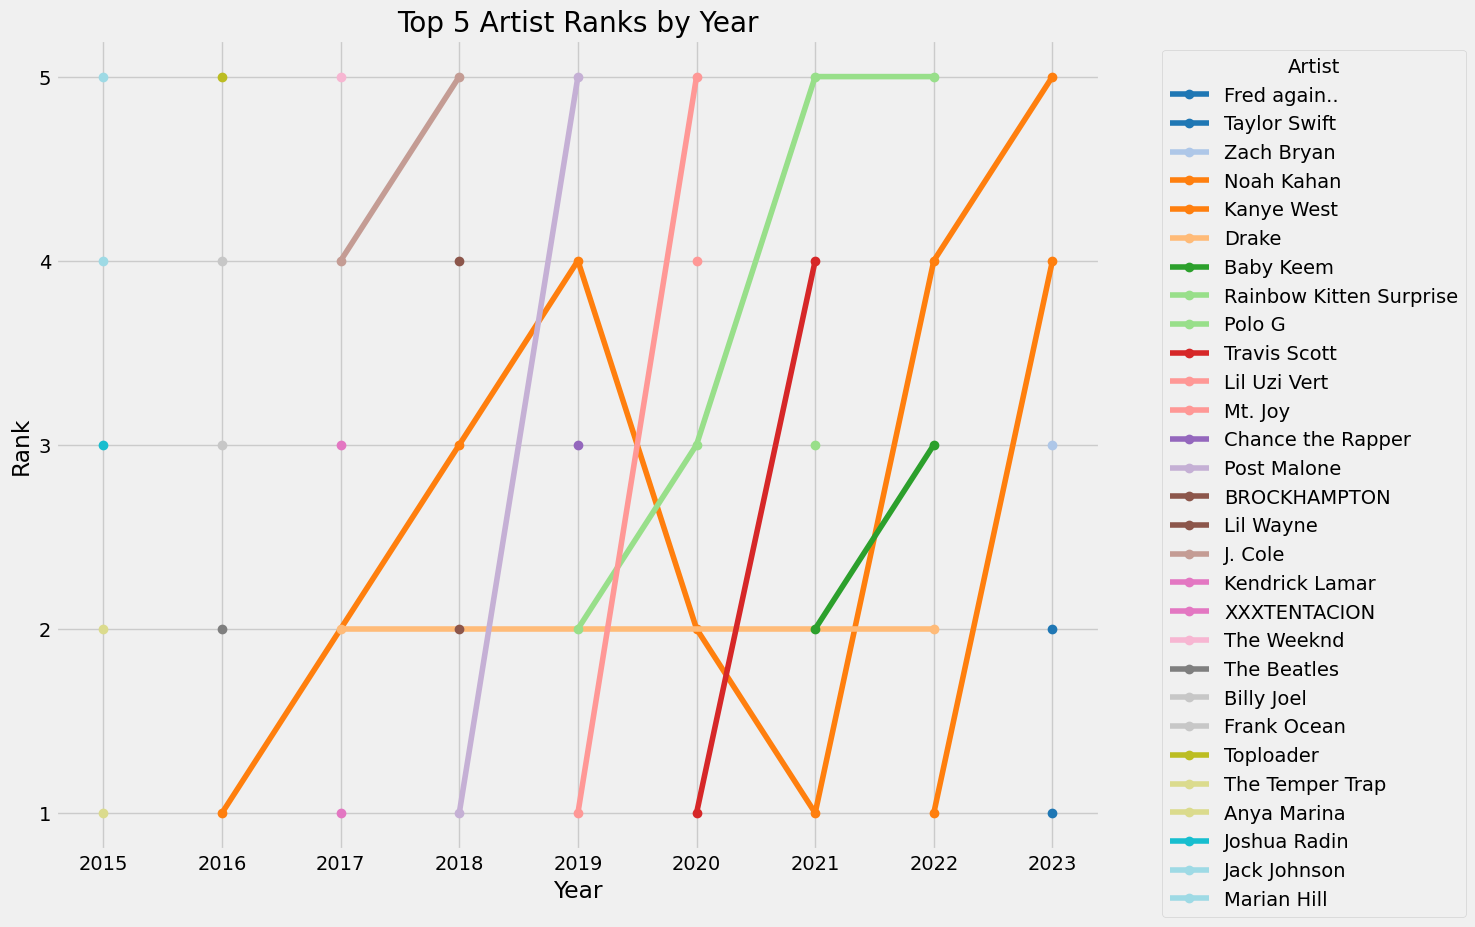

In [330]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

plt.close('all')  # Close any previously open plots
plt.figure(figsize=(12, 10))
plt.yticks(range(1, 6))
# Get a color map with enough distinct colors
cmap = cm.get_cmap('tab20', len(top5_artists_years["master_metadata_album_artist_name"].unique()))

for i,artist in enumerate(top5_artists_years["master_metadata_album_artist_name"].unique()):
  print(artist)
  artist_df = top5_artists_years[top5_artists_years["master_metadata_album_artist_name"]==artist]
  plt.plot(artist_df["Year"], artist_df["rank"], label = artist,marker='o', color=cmap(i))

plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Top 5 Artist Ranks by Year')
plt.show

In [331]:
import plotly.graph_objs as go
import plotly.express as px

# Create a color map using Plotly's color scales
colors = px.colors.qualitative.Plotly

# Initialize a Plotly figure
fig = go.Figure()

# Iterate over each artist and add a trace for each
for i, artist in enumerate(top5_artists_years["master_metadata_album_artist_name"].unique()):
    artist_df = top5_artists_years[top5_artists_years["master_metadata_album_artist_name"] == artist]
    fig.add_trace(go.Scatter(
        x=artist_df["Year"],
        y=artist_df["rank"],
        mode='lines+markers',
        name=artist,
        marker=dict(size=8),
        line=dict(width=2),
        line_shape='linear',
        marker_color=colors[i % len(colors)],  # Cycle through the colors
        hovertemplate = f"<b>{artist}</b><br>Year: %{{x}}<br>Rank: %{{y}}<extra></extra>"
    ))

# Sort traces by rank in hover information
fig.update_traces(
    selector=dict(type='scatter'),
    hoverinfo='skip',  # Skip default hover info
)

# Update layout
fig.update_layout(
    title="Top 5 Artist Ranks by Year",
    xaxis_title="Year",
    xaxis=dict(tickmode='linear', tick0=top5_artists_years["Year"].min(), dtick=1,range=[top5_artists_years["Year"].min(),top5_artists_years["Year"].max()]),
    yaxis_title="Rank",
    yaxis=dict(tickmode='linear', tick0=1, dtick=1,range=[5.1,0.9]),  # Ensure y-axis has whole numbers
    legend_title="Artist",
    hovermode="x unified",
    height=700,
    width=900
)

# Show the figure
fig.show()


#### Top 5 artist by playtime + visual

In [354]:
top_artist_playtime = songs.groupby(['master_metadata_album_artist_name',"Year"])['ms_played'].sum().reset_index(name="ms_total").sort_values(["Year","ms_total"],ascending=False)#.reset_index(drop=True)#.rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("ms_total",ascending=False).reset_index(drop=True)
top5_artists_playtime_years = top_artist_playtime.groupby('Year').head(5)
top5_artists_playtime_years['rank'] = top5_artists_playtime_years.groupby('Year')['ms_total'].rank(method='first', ascending=False).astype(int)

top5_artists_playtime_years

<ipython-input-354-38c28d75d87d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,master_metadata_album_artist_name,Year,ms_total,rank
12271,Taylor Swift,2023,63285417,1
14590,Zach Bryan,2023,61860959,2
4568,Fred again..,2023,56984627,3
9295,Noah Kahan,2023,41138032,4
6768,Kanye West,2023,19376515,5
9294,Noah Kahan,2022,73552233,1
3750,Drake,2022,45035191,2
14589,Zach Bryan,2022,38179547,3
1056,Baby Keem,2022,32782653,4
6877,Kendrick Lamar,2022,31536539,5


In [355]:
import plotly.graph_objs as go
import plotly.express as px

# Create a color map using Plotly's color scales
colors = px.colors.qualitative.Plotly

# Initialize a Plotly figure
fig = go.Figure()

# Iterate over each artist and add a trace for each
for i, artist in enumerate(top5_artists_playtime_years["master_metadata_album_artist_name"].unique()):
    artist_df = top5_artists_playtime_years[top5_artists_playtime_years["master_metadata_album_artist_name"] == artist]
    fig.add_trace(go.Scatter(
        x=artist_df["Year"],
        y=artist_df["rank"],
        mode='lines+markers',
        name=artist,
        marker=dict(size=8),
        line=dict(width=2),
        line_shape='linear',
        marker_color=colors[i % len(colors)],  # Cycle through the colors
        hovertemplate = f"<b>{artist}</b><br>Year: %{{x}}<br>Rank: %{{y}}<extra></extra>"
    ))

# Sort traces by rank in hover information
fig.update_traces(
    selector=dict(type='scatter'),
    hoverinfo='skip',  # Skip default hover info
)

# Update layout
fig.update_layout(
    title="Top 5 Artist Ranks by Year",
    xaxis_title="Year",
    xaxis=dict(tickmode='linear', tick0=top5_artists_playtime_years["Year"].min(), dtick=1,range=[top5_artists_playtime_years["Year"].min(),top5_artists_playtime_years["Year"].max()]),
    yaxis_title="Rank",
    yaxis=dict(tickmode='linear', tick0=1, dtick=1,range=[5.1,0.9]),  # Ensure y-axis has whole numbers
    legend_title="Artist",
    hovermode="x unified",
    height=700,
    width=900
)

# Show the figure
fig.show()


#### Top 5 songs by plays + visual

Could be interesting to look at the aggregated count of songs per artist. Rank it that way as songs often won't repeat but maybe an artist would repeat songs that are in the top 5. Could weight based on count in top 5... something that would weight for multiple songs & also higher ranking

Song visual isn't very interesting with constantly changing, not going to look at the playtime

In [332]:
top_songs_years = songs.groupby(["master_metadata_album_artist_name","master_metadata_track_name","Year"]).size().reset_index(name='count_played').sort_values(["Year","count_played"],ascending=False)
top5_songs_years = top_songs_years.groupby('Year').head(5)
top5_songs_years['rank'] = top5_songs_years.groupby('Year')['count_played'].rank(method='first', ascending=False).astype(int)

top5_songs_years

<ipython-input-332-6e27a1cf7a11>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,master_metadata_album_artist_name,master_metadata_track_name,Year,count_played,rank
11986,Fred again..,Delilah (pull me out of this),2023,56,1
32949,Taylor Swift,ivy,2023,54,2
32933,Taylor Swift,cardigan,2023,45,3
40510,Zach Bryan,Dawns (feat. Maggie Rogers),2023,44,4
14367,Husbands,Must Be a Cop,2023,40,5
30382,School of X,New Friend,2022,52,1
25846,Noah Kahan,Stick Season,2022,46,2
38058,Van Morrison,Into the Mystic - 2013 Remaster,2022,44,3
11148,Father John Misty,Chateau Lobby #4 (in C for Two Virgins),2022,41,4
20434,Lil Loaded,6locc 6a6y,2022,37,5


In [333]:
import plotly.graph_objs as go
import plotly.express as px

# Create a color map using Plotly's color scales
colors = px.colors.qualitative.Plotly

# Initialize a Plotly figure
fig = go.Figure()

# Iterate over each song and add a trace for each
for i, song in enumerate(top5_songs_years["master_metadata_track_name"].unique()):
    songs_df = top5_songs_years[top5_songs_years["master_metadata_track_name"] == song]
    fig.add_trace(go.Scatter(
        x=songs_df["Year"],
        y=songs_df["rank"],
        mode='lines+markers',
        name=song,
        marker=dict(size=8),
        line=dict(width=2),
        line_shape='linear',
        marker_color=colors[i % len(colors)],  # Cycle through the colors
        hovertemplate = f"<b>{song}</b><br>Year: %{{x}}<br>Rank: %{{y}}<extra></extra>"
    ))

# Sort traces by rank in hover information
fig.update_traces(
    selector=dict(type='scatter'),
    hoverinfo='skip',  # Skip default hover info
)

# Update layout
fig.update_layout(
    title="Top 5 Song Ranks by Year",
    xaxis_title="Year",
    xaxis=dict(tickmode='linear', tick0=top5_songs_years["Year"].min(), dtick=1,range=[top5_songs_years["Year"].min(),top5_songs_years["Year"].max()]),
    yaxis_title="Rank",
    yaxis=dict(tickmode='linear', tick0=1, dtick=1,range=[5.1,0.9]),  # Ensure y-axis has whole numbers
    legend_title="Song",
    hovermode="x unified",
    height=700,
    width=900
)

# Show the figure
fig.show()


## Podcasts

### Top podcast overall

#### Top podcasts plays

In [357]:
# Top artists
print("Podcast count: "+str(len(songs['episode_show_name'].value_counts())))
print("Top podcast")
top_podcasts = pods['episode_show_name'].value_counts().reset_index().rename(columns={'ms_played': 'ms_total',"episode_show_name":"Podcast_Name","count":"count_played"})
top_podcasts.index = top_podcasts.index + 1
top_podcasts = top_podcasts.reset_index(names=["overall_podcast_ranking"])
print(top_podcasts.head())

Podcast count: 0
Top podcast
   overall_podcast_ranking              Podcast_Name  count_played
0                        1        Freakonomics Radio           164
1                        2          American Scandal            78
2                        3  The Joe Rogan Experience            68
3                        4     Wall Street Breakfast            66
4                        5       Global News Podcast            52


#### Top podcast playtime

In [360]:
# Top artists by playtime
#print(combined_df['master_metadata_album_artist_name'].value_counts().head())
top_podcasts = pods.groupby('episode_show_name')['ms_played'].sum().reset_index().rename(columns={'ms_played': 'ms_total',"episode_show_name":"Podcast_Name"}).sort_values("ms_total",ascending=False).reset_index(drop=True)
top_podcasts.index = top_podcasts.index + 1
top_podcasts = top_podcasts.reset_index(names=["playtime_podcast_ranking"])

#artist_playtime = songs.groupby('master_metadata_album_artist_name')['ms_played'].sum().reset_index().rename(columns={'ms_played': 'ms_total','master_metadata_track_name':'Track_Name',"master_metadata_album_artist_name":"Artist_Name"}).sort_values("ms_total",ascending=False).reset_index(names=["playtime_artist_ranking"])#drop=True)
top_podcasts["min_played"] = top_podcasts["ms_total"]/60000
top_podcasts["hr_played"] = top_podcasts["min_played"]/60
print(top_podcasts.head())
#song_playtime

   playtime_podcast_ranking              Podcast_Name   ms_total   min_played  \
0                         1        Freakonomics Radio  328523412  5475.390200   
1                         2  The Joe Rogan Experience  225524359  3758.739317   
2                         3          American Scandal  166387967  2773.132783   
3                         4       Global News Podcast   74487494  1241.458233   
4                         5      The Best of Car Talk   56419532   940.325533   

   hr_played  
0  91.256503  
1  62.645655  
2  46.218880  
3  20.690971  
4  15.672092  


### Top podcast by year

In [361]:
pods.head()
pods['Year'] = pd.DatetimeIndex(pods['ts']).year
print(pods["Year"].shape)
pods["Year"].value_counts()

(864,)


<ipython-input-361-76eaef49045e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,count
Year,
2022,320
2023,230
2021,101
2020,88
2018,63
2017,36
2019,26


In [364]:
top_pods_years = pods.groupby(["episode_show_name","Year"]).size().reset_index(name='count_played').sort_values(["Year","count_played"],ascending=False)
top5_pods_years = top_pods_years.groupby('Year').head(5)
top5_pods_years['rank'] = top5_pods_years.groupby('Year')['count_played'].rank(method='first', ascending=False).astype(int)
top5_pods_years = top5_pods_years.reset_index(drop=True)
top5_pods_years

<ipython-input-364-ecb882b9ea90>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,episode_show_name,Year,count_played,rank
0,Wall Street Breakfast,2023,66,1
1,The Joe Rogan Experience,2023,46,2
2,Freakonomics Radio,2023,33,3
3,Almost Friday Podcast,2023,16,4
4,The Tim Dillon Show,2023,16,5
5,Freakonomics Radio,2022,82,1
6,American Scandal,2022,78,2
7,Global News Podcast,2022,42,3
8,The Best of Car Talk,2022,30,4
9,The Joe Rogan Experience,2022,22,5


In [ ]:
# Select ONLY podcasts

In [58]:
combined_df.nunique()

,0
ts,164429
username,1
platform,64
ms_played,53063
conn_country,9
ip_addr_decrypted,3051
user_agent_decrypted,17
master_metadata_track_name,21264
master_metadata_album_artist_name,6594
master_metadata_album_album_name,13998


In [60]:
artists = combined_df['master_metadata_album_artist_name'].unique()

In [67]:
combined_df['master_metadata_album_artist_name'].value_counts()

,count
master_metadata_album_artist_name,
Kanye West,11103
Drake,8202
Post Malone,7245
J. Cole,6492
Kendrick Lamar,5874
...,...
D'Angelo,3
ROZES,3
Ball Park Music,3


In [68]:
combined_df['master_metadata_album_album_name'].value_counts()

,count
master_metadata_album_album_name,
Tha Carter V,3699
beerbongs & bentleys,3120
The Life Of Pablo,3018
Stoney,2892
Mt. Joy,2715
...,...
Relaxation Time,3
Yoga Morning,3
Barcelona Atmosphere,3


In [64]:
artists_df = combined_df.groupby('master_metadata_album_artist_name').agg('count')

In [65]:
combined_df

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
master_metadata_album_artist_name,,,,,,,,,,,,,,,,,,,,
"""DAVE""",3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,0,3,3,3
"""Weird Al"" Yankovic",9,9,9,9,9,9,9,9,9,9,0,0,0,9,9,9,0,9,9,9
$NOT,93,93,93,93,93,93,93,93,93,93,0,0,0,93,93,93,6,93,93,93
$tupid Young,114,114,114,114,114,114,114,114,114,114,0,0,0,114,114,114,9,114,114,114
$uicideboy$,228,228,228,228,228,228,228,228,228,228,0,0,0,228,228,228,0,228,228,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
張露,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,0,3,3,3
愛THE BLXCK SINATRA死,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,0,3,3,3
暁テル子,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,0,3,3,3


# Export Data joining

## Playlist file

In [428]:
storage_client = storage.Client()
bucket_name = 'streaminghistory'
bucket = storage_client.get_bucket(bucket_name)
folder = "MyData1"
subfolder = "Playlist"

# Prefix to filter files
prefix = folder+'/'+subfolder
dfs = []
# List blobs (files) in the bucket with the specified prefix
blobs = bucket.list_blobs(prefix=prefix)

# Collect the file names
file_names = [blob.name for blob in blobs]
print(file_names)
for file in file_names:
  print(file)

for i in range(len(file_names)):
  file_name = file_names[i]
  local_file_name = subfolder+str([i][0])+".json"
  #print(local_file_name)
  #print(file_name)
  blob = bucket.blob(file_name)
  blob.download_to_filename(local_file_name)
  df = pd.read_json(local_file_name)

  dfs.append(df)
playlist_df = pd.concat(dfs, ignore_index=True)

['MyData1/Playlist1.json']
MyData1/Playlist1.json


In [429]:
playlist_df.head()
# each row is a playlist

,playlists
0,"{'name': 'My recommendation playlist', 'lastMo..."
1,"{'name': '7/11/23', 'lastModifiedDate': '2023-..."
2,"{'name': 'Benpn', 'lastModifiedDate': '2023-04..."
3,"{'name': 'Benpg', 'lastModifiedDate': '2023-04..."
4,"{'name': 'R&B', 'lastModifiedDate': '2023-03-1..."


In [430]:
pd.json_normalize(playlist_df['playlists'], max_level=1)


,name,lastModifiedDate,items,description,numberOfFollowers
0,My recommendation playlist,2023-07-27,"[{'track': {'trackName': 'Runaway Train', 'art...",Playlist created by the tutorial on developer....,0
1,7/11/23,2023-07-13,"[{'track': {'trackName': 'Sawteeth', 'artistNa...",None,0
2,Benpn,2023-04-23,"[{'track': {'trackName': 'Radio', 'artistName'...",None,0
3,Benpg,2023-04-23,"[{'track': {'trackName': 'Le temps est bon', '...",None,0
4,R&B,2023-03-11,[{'track': {'trackName': 'Inner City Blues (Ma...,None,0
...,...,...,...,...,...
119,my attempt to rid myself of these crushing fee...,2018-09-18,"[{'track': {'trackName': 'Sidewalks', 'artistN...",None,0
120,Jesuit Tahoe 2016,2022-03-25,[{'track': {'trackName': 'Bohemian Rhapsody - ...,None,8
121,Venus,2018-09-18,"[{'track': {'trackName': 'Ultralight Beam', 'a...",None,0
122,Pluto,2018-09-18,"[{'track': {'trackName': 'Ultralight Beam', 'a...",None,0


In [431]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   playlists  124 non-null    object
dtypes: object(1)
memory usage: 1.1+ KB


In [432]:
playlists = pd.json_normalize(playlist_df['playlists'], max_level=1)
playlists.head()

,name,lastModifiedDate,items,description,numberOfFollowers
0,My recommendation playlist,2023-07-27,"[{'track': {'trackName': 'Runaway Train', 'art...",Playlist created by the tutorial on developer....,0
1,7/11/23,2023-07-13,"[{'track': {'trackName': 'Sawteeth', 'artistNa...",None,0
2,Benpn,2023-04-23,"[{'track': {'trackName': 'Radio', 'artistName'...",None,0
3,Benpg,2023-04-23,"[{'track': {'trackName': 'Le temps est bon', '...",None,0
4,R&B,2023-03-11,[{'track': {'trackName': 'Inner City Blues (Ma...,None,0


In [433]:
len(playlists.iloc[1][["items"]])
playlists.iloc[1][["items"]]

,1
items,"[{'track': {'trackName': 'Sawteeth', 'artistNa..."


In [434]:
# for j in range(len(playlists)):
#   print(j)
#   for i in playlists.iloc[j][["items"]].iloc[0]:
#     print(i)
#     trackName = i['track']['trackName']
#     artistName = i['track']['artistName']
#     albumName = i['track']['albumName']
#     trackUri = i['track']['trackUri']

In [435]:
from collections import defaultdict

#playlist_songs = {}
playlist_songs = defaultdict(int)
for j in range(len(playlists)):
  print(j)
  for i in playlists.iloc[j][["items"]].iloc[0]:
    print(i)
    trackName = i['track']['trackName']
    artistName = i['track']['artistName']
    albumName = i['track']['albumName']
    trackUri = i['track']['trackUri']
    #my_dict.setdefault(trackName, 0).append(value)

    playlist_songs[artistName] += 1


0
{'track': {'trackName': 'Runaway Train', 'artistName': 'Soul Asylum', 'albumName': 'Black Gold: The Best Of Soul Asylum', 'trackUri': 'spotify:track:3Ib3SJV8ZXuLvDiDb2w1As'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Creeper', 'artistName': 'The Terrys', 'albumName': 'True Colour', 'trackUri': 'spotify:track:1wzmNsx0Osl5vJ9QWcKzUL'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Out Of Luck', 'artistName': 'Old Mervs', 'albumName': 'Out Of Luck', 'trackUri': 'spotify:track:3ITiZ7MiBhQ4yCYrWpHhVK'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Mol y Sol', 'artistName': 'Brijs', 'albumName': 'Glitra', 'trackUri': 'spotify:track:7AlzbuJ7jtFC2roWwgXvLL'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Stop Sign', 'artistName': 'DICE', 'albumName': 'Stop Sign', 'trackUri': 'spotify:track:58EybRsv2eC0iUfiYTmw8a'}, 'e

### Most common playlist song

In [425]:
from collections import defaultdict

#playlist_songs = {}
playlist_songs = defaultdict(int)
for j in range(len(playlists)):
  print(j)
  for i in playlists.iloc[j][["items"]].iloc[0]:
    print(i)
    trackName = i['track']['trackName']
    artistName = i['track']['artistName']
    albumName = i['track']['albumName']
    trackUri = i['track']['trackUri']
    #my_dict.setdefault(trackName, 0).append(value)

    playlist_songs[artistName] += 1

0
{'track': {'trackName': 'Runaway Train', 'artistName': 'Soul Asylum', 'albumName': 'Black Gold: The Best Of Soul Asylum', 'trackUri': 'spotify:track:3Ib3SJV8ZXuLvDiDb2w1As'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Creeper', 'artistName': 'The Terrys', 'albumName': 'True Colour', 'trackUri': 'spotify:track:1wzmNsx0Osl5vJ9QWcKzUL'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Out Of Luck', 'artistName': 'Old Mervs', 'albumName': 'Out Of Luck', 'trackUri': 'spotify:track:3ITiZ7MiBhQ4yCYrWpHhVK'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Mol y Sol', 'artistName': 'Brijs', 'albumName': 'Glitra', 'trackUri': 'spotify:track:7AlzbuJ7jtFC2roWwgXvLL'}, 'episode': None, 'localTrack': None, 'addedDate': '2023-07-27'}
{'track': {'trackName': 'Stop Sign', 'artistName': 'DICE', 'albumName': 'Stop Sign', 'trackUri': 'spotify:track:58EybRsv2eC0iUfiYTmw8a'}, 'e

In [426]:
playlist_songs = dict(sorted(playlist_songs.items(), key=lambda item: item[1],reverse=True))
playlist_songs

{'Chance the Rapper': 62,
 'Kanye West': 60,
 'A$AP Rocky': 33,
 'Post Malone': 29,
 'The Lumineers': 25,
 'J. Cole': 24,
 "The Mowgli's": 24,
 'Mt. Joy': 23,
 'Drake': 21,
 'Brian Fresco': 19,
 'Cage The Elephant': 18,
 'Vance Joy': 18,
 'Rainbow Kitten Surprise': 17,
 'Kendrick Lamar': 17,
 'Caamp': 17,
 'BROCKHAMPTON': 16,
 'Dreamville': 16,
 'Frank Ocean': 15,
 'The Head And The Heart': 15,
 'JID': 14,
 'Travis Scott': 13,
 'The Beatles': 12,
 'Zach Bryan': 12,
 'Coldplay': 12,
 'Young Thug': 11,
 'The Weeknd': 11,
 'Ed Sheeran': 11,
 'Green Day': 11,
 'Eminem': 11,
 'Joey Bada$$': 10,
 'Jimi Hendrix': 10,
 'Lil Wayne': 10,
 'Big Sean': 10,
 'Vista Kicks': 10,
 'Stevie Wonder': 9,
 'Migos': 9,
 'My Chemical Romance': 9,
 'Dave': 8,
 'Kodak Black': 8,
 'XXXTENTACION': 8,
 'EARTHGANG': 8,
 'CAKE': 8,
 'Bon Iver': 8,
 'Mac Miller': 8,
 'Logic': 8,
 'Lil Baby': 7,
 'A$AP Mob': 7,
 'Zac Brown Band': 7,
 'The Smashing Pumpkins': 7,
 'Tyler, The Creator': 7,
 'Fall Out Boy': 7,
 'Twenty O

#### Playlist viz songs & song count > 1

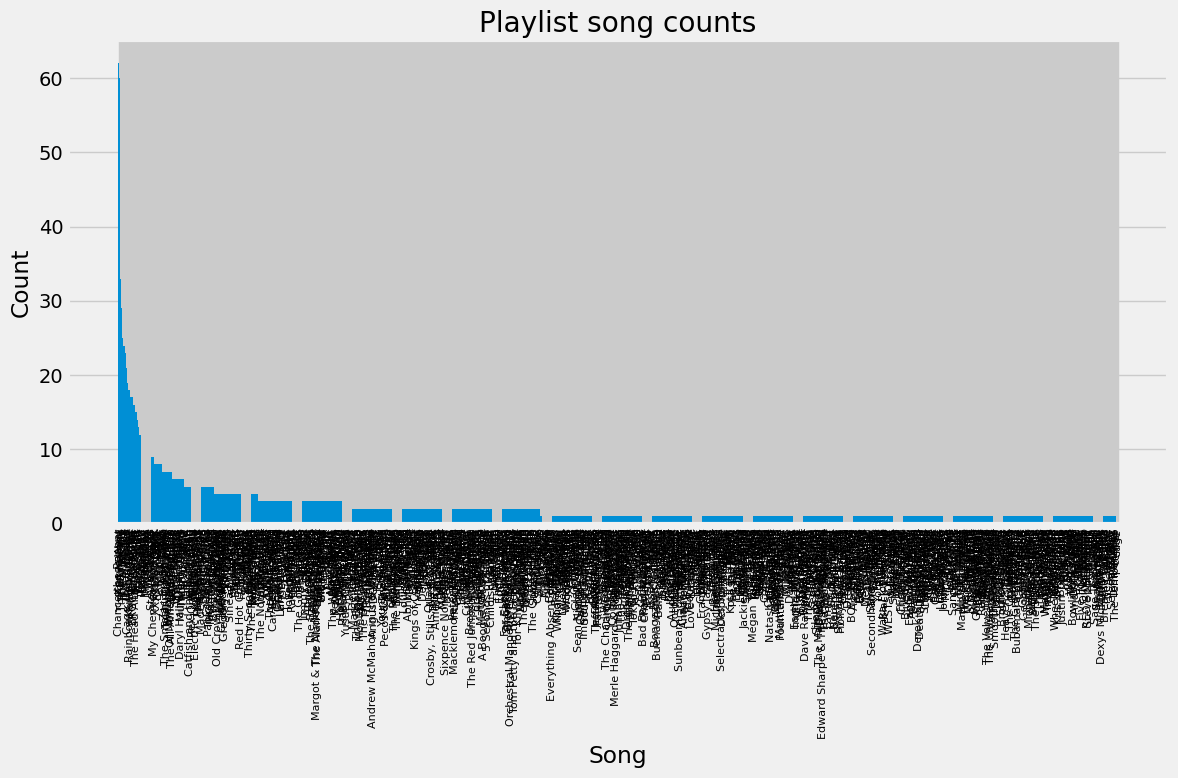

In [470]:
playlist_songs.values()
plt.close("all")
#plt.rcParams['text.usetex'] = False
escaped_playlist_songs = {key.replace('$', r'\$'): value for key, value in playlist_songs.items()}
escaped_playlist_songs = dict(sorted(escaped_playlist_songs.items(), key=lambda item: item[1],reverse=True))

# Extract keys and values
keys = list(escaped_playlist_songs.keys())
values = list(escaped_playlist_songs.values())

# Create a bar plot
plt.figure(figsize=(12, 8))
#plt.bar(keys, sorted(values), color='skyblue')
plt.bar(range(len(escaped_playlist_songs)), list(escaped_playlist_songs.values()), align='center')
plt.xticks(range(len(escaped_playlist_songs)), list(escaped_playlist_songs.keys()), rotation='vertical', fontsize=8)

# Add titles and labels
plt.title('Playlist song counts')
plt.xlabel('Song')
plt.ylabel('Count')
plt.tight_layout()

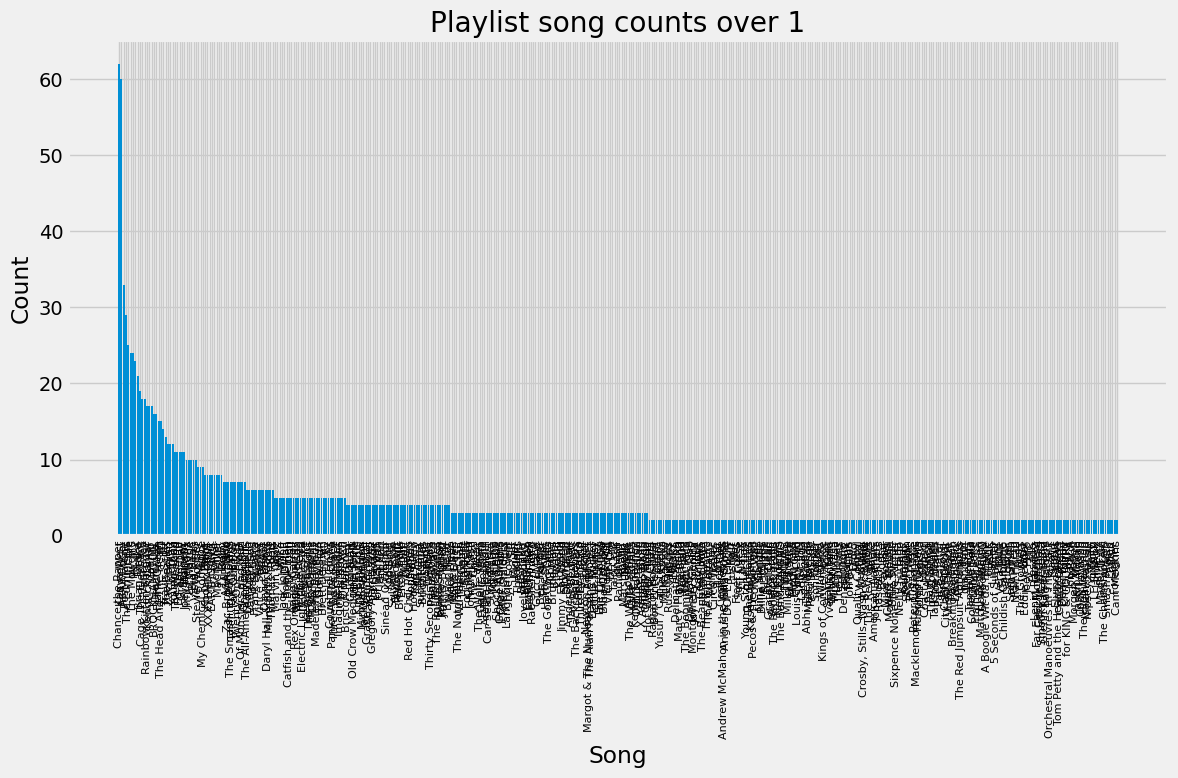

In [463]:
plt.close("all")
#plt.rcParams['text.usetex'] = False
escaped_playlist_songs_over_1 = dict((k, v) for k, v in escaped_playlist_songs.items() if v > 1)

# Extract keys and values
keys = list(escaped_playlist_songs_over_1.keys())
values = list(escaped_playlist_songs_over_1.values())

# Create a bar plot
plt.figure(figsize=(12, 8))
#plt.bar(keys, sorted(values), color='skyblue')
plt.bar(range(len(escaped_playlist_songs_over_1)), list(escaped_playlist_songs_over_1.values()), align='center')
plt.xticks(range(len(keys)), keys, rotation='vertical', fontsize=8)

# Add titles and labels
plt.title('Playlist song counts over 1')
plt.xlabel('Song')
plt.ylabel('Count')
plt.tight_layout()
#plt.xticks(rotation='vertical',fontsize=5)

## Query file

Only shows last ~3 months

In [471]:
storage_client = storage.Client()
bucket_name = 'streaminghistory'
bucket = storage_client.get_bucket(bucket_name)
folder = "MyData1"
subfolder = "SearchQueries"

# Prefix to filter files
prefix = folder+'/'+subfolder
dfs = []
# List blobs (files) in the bucket with the specified prefix
blobs = bucket.list_blobs(prefix=prefix)

# Collect the file names
file_names = [blob.name for blob in blobs]
print(file_names)
for file in file_names:
  print(file)

for i in range(len(file_names)):
  file_name = file_names[i]
  local_file_name = subfolder+str([i][0])+".json"
  #print(local_file_name)
  #print(file_name)
  blob = bucket.blob(file_name)
  blob.download_to_filename(local_file_name)
  df = pd.read_json(local_file_name)

  dfs.append(df)
queries_df = pd.concat(dfs, ignore_index=True)

['MyData1/SearchQueries.json']
MyData1/SearchQueries.json


In [500]:
queries_df
#queries_df[queries_df["searchInteractionURIs"].notna() and (len(queries_df["searchInteractionURIs"])>0)]
queries = queries_df[queries_df['searchInteractionURIs'].apply(lambda x: isinstance(x, list) and len(x) > 0)]
queries

,platform,searchTime,searchQuery,searchInteractionURIs
0,IPHONE,2023-05-03T04:23:03.260Z[UTC],zach,[spotify:artist:40ZNYROS4zLfyyBSs2PGe2]
14,IPHONE,2023-05-04T18:15:02.018Z[UTC],2 chaa,[spotify:artist:17lzZA2AlOHwCwFALHttmp]
33,IPHONE,2023-05-05T00:23:46.571Z[UTC],hogh bpm zach bry,"[spotify:artist:40ZNYROS4zLfyyBSs2PGe2, spotif..."
44,IPHONE,2023-05-05T02:26:11.873Z[UTC],zach bryan i recall,[spotify:track:2QfX9Pdz3q66fN3kCXl0Js]
45,IPHONE,2023-05-05T16:26:50.661Z[UTC],the xcott,[spotify:track:39Yp9wwQiSRIDOvrVg7mbk]
...,...,...,...,...
697,IPHONE,2023-07-28T03:49:46.296Z[UTC],big the,[spotify:artist:5QdyldG4Fl4TPiOIeMNpBZ]
699,IPHONE,2023-07-29T07:12:34.004Z[UTC],the frontbi,[spotify:artist:5ictveRyhWRs8Gt8Dvt1hS]
700,IPHONE,2023-07-29T08:26:53.110Z[UTC],the drums,"[spotify:artist:0p5axeJsbtTCXBrRVoKjwu, spotif..."
701,IPHONE,2023-07-29T08:30:37.897Z[UTC],sine,[spotify:artist:4sD9znwiVFx9cgRPZ42aQ1]


In [509]:
queries['timestamp'] = pd.to_datetime(queries['searchTime'].str.replace(r'\[.*\]', '', regex=True),format='ISO8601')#,format="%Y-%m-%dT%H:%M:%S.%f%Z")

<ipython-input-509-74f7b2c78213>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [514]:
queries["month"] = pd.DatetimeIndex(queries['timestamp']).month
queries.head()

<ipython-input-514-3aae84e9cb2d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,platform,searchTime,searchQuery,searchInteractionURIs,timestamp,month
0,IPHONE,2023-05-03T04:23:03.260Z[UTC],zach,[spotify:artist:40ZNYROS4zLfyyBSs2PGe2],2023-05-03 04:23:03.260000+00:00,5
14,IPHONE,2023-05-04T18:15:02.018Z[UTC],2 chaa,[spotify:artist:17lzZA2AlOHwCwFALHttmp],2023-05-04 18:15:02.018000+00:00,5
33,IPHONE,2023-05-05T00:23:46.571Z[UTC],hogh bpm zach bry,"[spotify:artist:40ZNYROS4zLfyyBSs2PGe2, spotif...",2023-05-05 00:23:46.571000+00:00,5
44,IPHONE,2023-05-05T02:26:11.873Z[UTC],zach bryan i recall,[spotify:track:2QfX9Pdz3q66fN3kCXl0Js],2023-05-05 02:26:11.873000+00:00,5
45,IPHONE,2023-05-05T16:26:50.661Z[UTC],the xcott,[spotify:track:39Yp9wwQiSRIDOvrVg7mbk],2023-05-05 16:26:50.661000+00:00,5


In [515]:
queries["month"].value_counts()

,count
month,
7,136
5,51
6,47


### Top query

In [528]:
import nltk
from nltk.stem import PorterStemmer

In [529]:
porter = PorterStemmer()
queries["stemmedQuery"] = queries["searchQuery"].apply(porter.stem)

<ipython-input-529-7669f94ede01>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [534]:
# Top artists
top_queries = queries['searchQuery'].value_counts().reset_index().rename(columns={"count":"count_played"})
top_queries.index = top_queries.index + 1
top_queries = top_queries.reset_index(names=["query_ranking"])
print(top_queries.head(10))
top_queries.count()

   query_ranking searchQuery  count_played
0              1         jre             3
1              2       maude             3
2              3        yoko             2
3              4        fore             2
4              5        mssp             2
5              6     matchbo             2
6              7         3am             2
7              8   the drums             2
8              9   the xcott             2
9             10   rileyy124             2


,0
query_ranking,222
searchQuery,222
count_played,222


#### Top with tokenization & stemming

In [533]:
# Top artists w/ porter stemmer ... still similar
top_queries_stemmed = queries['stemmedQuery'].value_counts().reset_index().rename(columns={"count":"count_played"})
top_queries_stemmed.index = top_queries_stemmed.index + 1
top_queries_stemmed = top_queries_stemmed.reset_index(names=["query_ranking"])
print(top_queries_stemmed.head(10))
top_queries_stemmed.count()
# 1 less row

   query_ranking stemmedQuery  count_played
0              1          jre             3
1              2         maud             3
2              3    rileyy124             2
3              4         fore             2
4              5         mssp             2
5              6      matchbo             2
6              7          3am             2
7              8     the drum             2
8              9    the xcott             2
9             10         yoko             2


,0
query_ranking,221
stemmedQuery,221
count_played,221


## Library file

In [536]:
storage_client = storage.Client()
bucket_name = 'streaminghistory'
bucket = storage_client.get_bucket(bucket_name)
folder = "MyData1"
subfolder = "YourLibrary"

# Prefix to filter files
prefix = folder+'/'+subfolder
dfs = []
# List blobs (files) in the bucket with the specified prefix
blobs = bucket.list_blobs(prefix=prefix)

# Collect the file names
file_names = [blob.name for blob in blobs]
print(file_names)
for file in file_names:
  print(file)

for i in range(len(file_names)):
  file_name = file_names[i]
  local_file_name = subfolder+str([i][0])+".json"
  #print(local_file_name)
  #print(file_name)
  blob = bucket.blob(file_name)
  blob.download_to_filename(local_file_name)
  df = pd.read_json(local_file_name,orient='index')

  dfs.append(df)
library_df = pd.concat(dfs, ignore_index=True)

['MyData1/YourLibrary.json']
MyData1/YourLibrary.json


In [544]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028
tracks,"{'artist': 'The Kid LAROI', 'album': 'TELL ME ...","{'artist': 'J.J. Cale', 'album': 'Naturally', ...","{'artist': 'John Prine', 'album': 'Bruised Ora...","{'artist': 'Jonas Brothers', 'album': 'A Littl...","{'artist': 'Pusha T', 'album': 'My Name Is My ...","{'artist': 'Alex Newell', 'album': 'Kill The L...","{'artist': 'Playyard', 'album': 'Cold Shoulder...","{'artist': 'Shakey Graves', 'album': 'And The ...","{'artist': 'T. Rex', 'album': 'Electric Warrio...","{'artist': '99 Neighbors', 'album': 'Thunder',...",...,"{'artist': 'Blackberry Smoke', 'album': 'The W...","{'artist': 'Vundabar', 'album': 'Devil for the...","{'artist': 'Baby Keem', 'album': 'The Melodic ...","{'artist': 'CASTLEBEAT', 'album': 'Half Life',...","{'artist': 'Phil Collins', 'album': 'No Jacket...","{'artist': 'SleazyWorld Go', 'album': 'Sleazy ...","{'artist': 'OFB', 'album': 'Frontstreet', 'tra...","{'artist': 'Issam Alnajjar', 'album': 'Hadal A...","{'artist': 'Montgomery Gentry', 'album': 'You ...","{'artist': 'Baby Keem', 'album': 'DIE FOR MY B..."
albums,"{'artist': 'Steve Lacy', 'album': 'Steve Lacy'...","{'artist': 'Gucci Mane', 'album': 'Delusions o...","{'artist': 'Post Malone', 'album': 'beerbongs ...","{'artist': 'Trippie Redd', 'album': 'LIFE'S A ...","{'artist': 'Lil Wayne', 'album': 'Tha Carter V...","{'artist': 'Ameer Vann', 'album': 'EMMANUEL', ...","{'artist': 'Rebelution', 'album': 'Courage to ...","{'artist': 'AJJ', 'album': 'People Who Can Eat...","{'artist': 'Zach Bryan', 'album': 'Quiet, Heav...","{'artist': 'Mt. Joy', 'album': 'Death', 'uri':...",...,None,None,None,None,None,None,None,None,None,None
shows,"{'name': 'Build a Career in Data Science', 'pu...","{'name': 'EconTalk', 'publisher': 'Russ Robert...","{'name': 'Freakonomics Radio', 'publisher': 'F...",{'name': 'Invest Like the Best with Patrick O'...,"{'name': 'Lex Fridman Podcast', 'publisher': '...","{'name': 'Macro Musings with David Beckworth',...","{'name': 'MarketFoolery', 'publisher': 'The Mo...","{'name': 'Motley Fool Money', 'publisher': 'Th...","{'name': 'The Best of Car Talk', 'publisher': ...","{'name': 'The Economist Podcasts', 'publisher'...",...,None,None,None,None,None,None,None,None,None,None
episodes,{'name': 'Why Living Without Regret is a Bad I...,{'name': '#340 – Chris Tarbell: FBI Agent Who ...,{'name': '#341 – Guido van Rossum: Python and ...,{'name': '#367 – Sam Altman: OpenAI CEO on GPT...,"{'name': '#336 – Ben Shapiro: Politics, Kanye,...","{'name': '#337 – Destiny: Politics, Free Speec...",{'name': '#56 Ryan Montgomery - #1 Ethical Hac...,{'name': 'GO THE FUCK TO SLEEP as read by Samu...,"{'name': 'fortnite battle pass', 'show': 'GAME...","{'name': '484. “A Fascinating, Sexy, Intellect...",...,None,None,None,None,None,None,None,None,None,None
bannedTracks,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [546]:
# I only really am interested in tracks
albums = df.loc["albums"]
tracks = df.loc["tracks"]
shows = df.loc["shows"]
episodes = df.loc["episodes"]

In [553]:
tracks.iloc[0]

{'artist': 'The Kid LAROI',
 'album': 'TELL ME WHY',
 'track': 'TELL ME WHY',
 'uri': 'spotify:track:27BBfeJZBFlZ60Sgx7iOgL'}

### Top saved artist

Worth revisiting on genre level later

In [561]:
#tracks
#playlist_songs = {}
saved_tracks = defaultdict(int)
for j in range(len(tracks)):
  #print(j)
  trackName = tracks.iloc[j]['track']
  artistName = tracks.iloc[j]['artist']
  albumName = tracks.iloc[j]['album']
  trackUri = tracks.iloc[j]['uri']
  #my_dict.setdefault(trackName, 0).append(value)

  saved_tracks[artistName] += 1

saved_tracks = dict(sorted(saved_tracks.items(), key=lambda item: item[1],reverse=True))
saved_tracks

{'Kanye West': 70,
 'Post Malone': 43,
 'Drake': 38,
 'Lil Wayne': 35,
 'J. Cole': 32,
 'Travis Scott': 28,
 'Baby Keem': 27,
 'Trippie Redd': 26,
 'Lil Uzi Vert': 26,
 'Rainbow Kitten Surprise': 25,
 'BROCKHAMPTON': 24,
 'A$AP Rocky': 24,
 'Lil Baby': 23,
 'Kodak Black': 22,
 'VIC MENSA': 22,
 'Chance the Rapper': 22,
 'The Beatles': 21,
 'Mt. Joy': 20,
 'Future': 20,
 'Polo G': 19,
 'Taylor Swift': 18,
 'Young Thug': 18,
 'Zach Bryan': 18,
 'Tyler, The Creator': 17,
 'XXXTENTACION': 17,
 'Migos': 17,
 'Kendrick Lamar': 17,
 'The Weeknd': 16,
 'Eminem': 16,
 'Playboi Carti': 16,
 'The 1975': 16,
 'Led Zeppelin': 15,
 'Juice WRLD': 15,
 'CAKE': 15,
 'Aminé': 15,
 'JAY-Z': 15,
 'Lil Yachty': 14,
 'Vince Staples': 14,
 'Ritt Momney': 13,
 'Huncho Jack': 13,
 'Bob Dylan': 13,
 'Caamp': 13,
 'JID': 13,
 'Cordae': 12,
 'Fred again..': 12,
 'The Lumineers': 12,
 'DaBaby': 11,
 'Frank Ocean': 11,
 'EARTHGANG': 11,
 'Pusha T': 10,
 'Dreamville': 10,
 'Jack Johnson': 10,
 '21 Savage': 10,
 'Pop

# API data joining

Song genres, etc.

Genres are at artist level \
https://api.spotify.com/v1/artists/{id} \
Audio-features for song at high level \
https://api.spotify.com/v1/audio-features/{id} \
Audio-analysis for song at low level \
https://api.spotify.com/v1/audio-analysis/{id} \



In [602]:
from google.colab import userdata
client_id = userdata.get('clientId')
client_secret = userdata.get('clientSecret')

f28aa6eb1a1f4559901446fd3a192793
4025717da5dc4143b32baad3a385cbea


### Via API

In [581]:
import requests
from urllib.parse import urlencode
import base64
import webbrowser

In [756]:
client_id = client_id
client_secret = client_secret

def get_token():
    url = "https://accounts.spotify.com/api/token"
    data = {"grant_type": "client_credentials", "client_id": client_id, "client_secret": client_secret}
    result = post(url, data=data)
    json_result = json.loads(result.content)
    token = json_result["access_token"]
    return token

def get_auth_header(token):
    return {"Authorization": "Bearer " + token}

def search_for_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = get_auth_header(token)
    query = f"q={artist_name}&type=artist&limit=1"

    query_url = url + "?" + query
    result = get(query_url, headers=headers)
    json_result = json.loads(result.content)["artists"]["items"]
    if len(json_result) == 0:
        print("no artist with this name exists")

    return json_result[0]

def get_songs_by_artist(token, artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks?country=US"
    headers = get_auth_header(token)
    result = get(url, headers=headers)
    json_result = json.loads(result.content)["tracks"]
    return json_result

In [757]:
token = get_token()
# print(token)

result = search_for_artist(token, "ACDC")
artist_id = result["id"]
# print(artist_id)

songs = get_songs_by_artist(token, artist_id)

for idx, song in enumerate(songs):
    print(f"{idx + 1}, {song['album']['name']}")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Via Spotipy

In [586]:
pip install spotipy

In [ ]:
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys
from requests import post, get

In [589]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

#results = sp.search(q='weezer', limit=20)
#for idx, track in enumerate(results['tracks']['items']):
#    print(idx, track['name'])

## Genre

In [610]:
def get_artist_genres(token, artist_id):
    url = f"https://api.spotify.com/v1/artists/{artist_id}"
    headers = get_auth_header(token)
    result = get(url, headers=headers)
    json_result = json.loads(result.content)["genres"]
    return json_result

In [654]:
result = search_for_artist(token, "Baby Keem")
artist_id = result["id"]
# print(artist_id)

genres = get_artist_genres(token, artist_id)
print(genres)

['hip hop', 'rap']


In [616]:
top_artists

,overall_artist_ranking,Artist_Name,count_played
0,1,Kanye West,3701
1,2,Drake,2734
2,3,Post Malone,2415
3,4,J. Cole,2164
4,5,Kendrick Lamar,1958
...,...,...,...
6589,6590,D'Angelo,1
6590,6591,ROZES,1
6591,6592,Ball Park Music,1
6592,6593,Maddison Hoolan,1


In [613]:
top_artists.count()

,0
overall_artist_ranking,6594
Artist_Name,6594
count_played,6594


In [639]:
top_artists

,overall_artist_ranking,Artist_Name,count_played,test_val
0,1,Kanye West,3701,0.0
1,2,Drake,2734,1.0
2,3,Post Malone,2415,2.0
3,4,J. Cole,2164,3.0
4,5,Kendrick Lamar,1958,4.0
...,...,...,...,...
6589,6590,D'Angelo,1,6589.0
6590,6591,ROZES,1,6590.0
6591,6592,Ball Park Music,1,6591.0
6592,6593,Maddison Hoolan,1,6592.0


In [657]:
np.nan

nan

In [658]:
for i in range(len(top_artists.loc[:,"Artist_Name"])):
  artist_name = top_artists.loc[i,"Artist_Name"]
  #print(artist_name)
  try:
    result = search_for_artist(token, artist_name)
    artist_id = result["id"]
    top_artists.loc[i,"artist_id"] = result["id"]
    print(artist_name, artist_id)
  except:
    print(f"No artist ID for {artist_name}")
    top_artists.loc[i,"artist_id"] = np.nan
  try:
    genres = get_artist_genres(token, artist_id)
    print(genres)
    top_artists.at[i,"artist_genre"] = list(genres)
  except:
    top_artists.at[i,"artist_genre"] = np.nan

Streaming output truncated to the last 5000 lines.
No artist ID for Canciones Infantiles En Español
Flight of the Conchords 2lRyvAihjwylPfhGqydQbC
No artist ID for Flight of the Conchords
Nine Days 306JHpIRGVaQd6OltnOzUO
No artist ID for Nine Days
GABY 3kpjdJZGFf13o7rVk8DGpK
No artist ID for GABY
Jonathan Hay 2IeMt1qx6ZVt1HFjdfE5tl
No artist ID for Jonathan Hay
Les Baxter 35pV6EUbherudlvAftoueR
No artist ID for Les Baxter
QUE. 4Mop3hBjHoSoKwwkzKD3Gi
No artist ID for QUE.
Maria Mena 3rTRHzFfbTk5GL3LpYZGHR
No artist ID for Maria Mena
TRAMP STAMPS 27dC1hPiY4d4MVVFyBSC9W
No artist ID for TRAMP STAMPS
I'm Blue 5Rdhduu4Zo7gs9FOt6YKbo
No artist ID for I'm Blue
Kelsea Ballerini 3RqBeV12Tt7A8xH3zBDDUF
No artist ID for Kelsea Ballerini
The Clovers 0ckkj0a9CvIJr4h84B0OlN
No artist ID for The Clovers
OVERWERK 2f9PTWJfMMDTAFZcvHy1Z5
No artist ID for OVERWERK
Tyler Rich 78eqps3BavCqe2q7GCU1VK
No artist ID for Tyler Rich
Brian Kelley 46c50yWMo9wiTgVe1VxBbQ
No artist ID for Brian Kelley
Mari 4iHNK0tOy

In [707]:
top_artists[["Artist_Name","artist_id","artist_genre"]]

,Artist_Name,artist_id,artist_genre
0,Kanye West,5K4W6rqBFWDnAN6FQUkS6x,"[chicago rap, hip hop, rap]"
1,Drake,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop ..."
2,Post Malone,246dkjvS1zLTtiykXe5h60,"[dfw rap, melodic rap, pop, rap]"
3,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,"[conscious hip hop, hip hop, north carolina hi..."
4,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,"[conscious hip hop, hip hop, rap, west coast rap]"
...,...,...,...
6589,D'Angelo,NaN,NaN
6590,ROZES,NaN,NaN
6591,Ball Park Music,NaN,NaN
6592,Maddison Hoolan,NaN,NaN


In [712]:
artists = top_artists[["Artist_Name","artist_id","artist_genre"]]

Filling in artists that weren't captured earlier

In [705]:
len(artists[artists["artist_genre"].isna()])
len(artists[artists["artist_id"].isna()])
len(artists[artists["artist_genre"].isna() & artists["artist_id"].isna()])
empty_genre = artists[artists["artist_genre"].isna()].reset_index(drop=True)
print(empty_genre)

for i in range(len(empty_genre)):
  artist_name = empty_genre.loc[i, "Artist_Name"]

  try:
    result = search_for_artist(token, artist_name)
    artist_id = result["id"]
    artists.loc[i,"artist_id"] = result["id"]
    print(artist_name, artist_id)
    idx = artists[artists["artist_name"] == artist_name].index
    artists.loc[idx, "artist_id"] = artist_id
  except:
    print(f"No artist ID for {artist_name}")
    artists.loc[i,"artist_id"] = np.nan
  try:
    genres = get_artist_genres(token, artist_id)
    print(genres)
    artists.loc[idx, "artist_genre"] = genre
    #artists.at[i,"artist_genre"] = list(genres)
  except:
    artists.at[i,"artist_genre"] = np.nan

                     Artist_Name artist_id artist_genre  test
0                      Zme Check       NaN          NaN   350
1     Luis Athena Bechtelaralter       NaN          NaN   350
2                 Jammier Bresky       NaN          NaN   350
3                  Binita Pandya       NaN          NaN   350
4                   The Jacksons       NaN          NaN   350
...                          ...       ...          ...   ...
2906                    D'Angelo       NaN          NaN   350
2907                       ROZES       NaN          NaN   350
2908             Ball Park Music       NaN          NaN   350
2909             Maddison Hoolan       NaN          NaN   350
2910                        DYVN       NaN          NaN   350

[2911 rows x 4 columns]
No artist ID for Zme Check
No artist ID for Luis Athena Bechtelaralter
No artist ID for Jammier Bresky
No artist ID for Binita Pandya
No artist ID for The Jacksons
No artist ID for The Starting Line
No artist ID for Wye Oak
No arti

In [713]:
artists

,Artist_Name,artist_id,artist_genre
0,Kanye West,5K4W6rqBFWDnAN6FQUkS6x,"[chicago rap, hip hop, rap]"
1,Drake,3TVXtAsR1Inumwj472S9r4,"[canadian hip hop, canadian pop, hip hop, pop ..."
2,Post Malone,246dkjvS1zLTtiykXe5h60,"[dfw rap, melodic rap, pop, rap]"
3,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,"[conscious hip hop, hip hop, north carolina hi..."
4,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,"[conscious hip hop, hip hop, rap, west coast rap]"
...,...,...,...
6589,D'Angelo,NaN,NaN
6590,ROZES,NaN,NaN
6591,Ball Park Music,NaN,NaN
6592,Maddison Hoolan,NaN,NaN


In [663]:
artists.to_json('Artists.json', orient = 'split', compression = 'infer', index = 'true')


In [715]:
def upload_blob_to_gcs(bucket_name, source_file_name, destination_blob_name):
  """Uploads a file to the bucket."""
  storage_client = storage.Client()
  bucket = storage_client.get_bucket(bucket_name)
  blob = bucket.blob(destination_blob_name)

  blob.upload_from_filename(source_file_name)

  print('File {} uploaded to {}.'.format(
      source_file_name,
      destination_blob_name))

In [687]:
# for i in range(len(artists[artists["artist_id"].isna()].loc[:,"Artist_Name"])):
#   artist_name = artists.loc[i,"Artist_Name"]
#   print(artist_name)
#   try:
#     result = search_for_artist(token, artist_name)
#     artist_id = result["id"]
#     artists.loc[i,"artist_id"] = result["id"]
#     print(artist_name, artist_id)
#   except:
#     print(f"No artist ID for {artist_name}")
#     artists.loc[i,"artist_id"] = np.nan
#   try:
#     genres = get_artist_genres(token, artist_id)
#     print(genres)
#     artists.at[i,"artist_genre"] = list(genres)
#   except:
#     artists.at[i,"artist_genre"] = np.nan

RAC
No artist ID for RAC
Cardboard Box
No artist ID for Cardboard Box
MARINA
No artist ID for MARINA
The City of Prague Philharmonic Orchestra
No artist ID for The City of Prague Philharmonic Orchestra
Jamey Johnson
No artist ID for Jamey Johnson
Swae Lee
No artist ID for Swae Lee
jamesjamesjames
No artist ID for jamesjamesjames
4 Non Blondes
No artist ID for 4 Non Blondes
KILLY
No artist ID for KILLY
Seven Lions
No artist ID for Seven Lions
Deltron 3030
No artist ID for Deltron 3030
Planet Giza
No artist ID for Planet Giza
lojii
No artist ID for lojii
Bonnie Tyler
No artist ID for Bonnie Tyler
Walker & Royce
No artist ID for Walker & Royce
Julie London
No artist ID for Julie London
Sasha
No artist ID for Sasha
Brandon Wardell
No artist ID for Brandon Wardell
Todd Rundgren
No artist ID for Todd Rundgren
Mungo Jerry
No artist ID for Mungo Jerry
Melanie Martinez
No artist ID for Melanie Martinez
Senses Fail
No artist ID for Senses Fail
Thursday
No artist ID for Thursday
NITTI
No artist I

KeyboardInterrupt: 

In [716]:
upload_blob_to_gcs('streaminghistory','Artists.json','constructedData/Artists.json')

File Artists.json uploaded to constructedData/Artists.json.


In [688]:
artists.head()
artists["artist_id"].value_counts()
artists["artist_genre"].value_counts()
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594 entries, 0 to 6593
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Artist_Name   6594 non-null   object
 1   artist_id     1 non-null      object
 2   artist_genre  1 non-null      object
dtypes: object(3)
memory usage: 154.7+ KB


In [751]:
genres = artists[artists["artist_genre"].notna()]["artist_genre"].reset_index(drop=True)
genres.explode()
genres.explode().value_counts()

,count
artist_genre,
rock,202
rap,173
pop,169
trap,148
classic rock,141
...,...
lo-fi cover,1
indie psych-pop,1
canadian folk,1


In [607]:
# # Shows the list of all songs sung by the artist or the band
# import argparse
# import logging

# from spotipy.oauth2 import SpotifyClientCredentials
# import spotipy

# logger = logging.getLogger('examples.artist_discography')
# logging.basicConfig(level='INFO')


# def get_args():
#     parser = argparse.ArgumentParser(description='Shows albums and tracks for '
#                                      'given artist')
#     parser.add_argument('-a', '--artist', required=True,
#                         help='Name of Artist')
#     return parser.parse_args()


# def get_artist(name):
#     results = sp.search(q='artist:' + name, type='artist')
#     items = results['artists']['items']
#     if len(items) > 0:
#         return items[0]
#     else:
#         return None


# def show_album_tracks(album):
#     tracks = []
#     results = sp.album_tracks(album['id'])
#     tracks.extend(results['items'])
#     while results['next']:
#         results = sp.next(results)
#         tracks.extend(results['items'])
#     for i, track in enumerate(tracks):
#         logger.info('%s. %s', i + 1, track['name'])


# def show_artist_albums(artist):
#     albums = []
#     results = sp.artist_albums(artist['id'], album_type='album')
#     albums.extend(results['items'])
#     while results['next']:
#         results = sp.next(results)
#         albums.extend(results['items'])
#     logger.info('Total albums: %s', len(albums))
#     unique = set()  # skip duplicate albums
#     for album in albums:
#         name = album['name'].lower()
#         if name not in unique:
#             logger.info('ALBUM: %s', name)
#             unique.add(name)
#             show_album_tracks(album)


# def show_artist(artist):
#     logger.info('====%s====', artist['name'])
#     logger.info('Popularity: %s', artist['popularity'])
#     if len(artist['genres']) > 0:
#         logger.info('Genres: %s', ','.join(artist['genres']))


# def main():
#     args = get_args()
#     artist = get_artist(args.artist)
#     show_artist(artist)
#     show_artist_albums(artist)


# if __name__ == '__main__':
#     client_credentials_manager = SpotifyClientCredentials()
#     sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#     main()

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

## Audio Features

In [774]:
def get_song_features(token, song_id):

    url = f"https://api.spotify.com/v1/audio-features/{song_id}"
    headers = get_auth_header(token)
    result = get(url, headers=headers)
    json_result = json.loads(result.content)#["genres"]
    return json_result

In [768]:
songs.columns.values

array(['ts', 'username', 'platform', 'ms_played', 'conn_country',
       'ip_addr_decrypted', 'user_agent_decrypted',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri',
       'episode_name', 'episode_show_name', 'spotify_episode_uri',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'track_uri'], dtype=object)

In [775]:
songs.columns.values
songs_df = songs[songs['spotify_track_uri'].str.contains('spotify:track:')]

songs_df["track_uri"] = songs_df["spotify_track_uri"].str.replace(r'spotify:track:', '', regex=True)
songs_df[["track_uri","master_metadata_track_name"]]

,track_uri,master_metadata_track_name
0,0XZSywnL0bjAq4xWfy2Tmw,Apollo - Radio Edit
1,5NQbUaeTEOGdD6hHcre0dZ,679 (feat. Remy Boyz)
2,5NQbUaeTEOGdD6hHcre0dZ,679 (feat. Remy Boyz)
3,00ekizdAvPUp495k8bkfGS,Rabbit Hole
4,69igAjKIJC7Plk3VIRe5Pp,The Sea Is Calling
...,...,...
174657,3IhtE4fkytdrtEfV34UzkD,betty
174658,3TwAePhxn7pwkdHNwpWgvp,3AM
174659,5KqldkCunQ2rWxruMEtGh0,The Gambler
174660,5rxMKmvHoRtwlnaYyxMGHb,Fun


In [772]:
songs_df.loc[0,"track_uri"]

'0XZSywnL0bjAq4xWfy2Tmw'

In [803]:
audio_feature = get_song_features(token, "0XZSywnL0bjAq4xWfy2Tmw")

In [805]:
type(audio_feature)

dict

In [808]:
song_feature_df = pd.DataFrame()
new_df = pd.DataFrame([audio_feature])
song_feature_df = pd.concat([song_feature_df, new_df], ignore_index=True)
song_feature_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.637,0.663,8,-3.764,1,0.0502,0.00364,0,0.317,0.404,128.135,audio_features,0XZSywnL0bjAq4xWfy2Tmw,spotify:track:0XZSywnL0bjAq4xWfy2Tmw,https://api.spotify.com/v1/tracks/0XZSywnL0bjA...,https://api.spotify.com/v1/audio-analysis/0XZS...,185625,4


TODO:
- refresh token
- wait for rate limit

In [ ]:
song_feature_df = pd.DataFrame()
songs_df[["track_uri","master_metadata_track_name"]]
for i in range(len(songs_df)):
  if i%1000:
    print(f"Fetching song features for track number: {i}")
  try:
    song_id = songs_df.loc[i,"track_uri"]
    song_name = songs_df.loc[i,"master_metadata_track_name"]
    audio_feature = get_song_features(token, song_id)
    #print(audio_feature)
    song_feature = pd.DataFrame([audio_feature])
    song_feature["song_name"] = song_name
    song_feature_df = pd.concat([song_feature_df, song_feature], ignore_index=True)
  except:
    song_feature = pd.DataFrame()
    song_feature["song_name"] = song_name
    song_feature_df = pd.concat([song_feature_df, song_feature], ignore_index=True)
  #song_feature_dfs = pd.concat(song_feature_dfs, ignore_index=True)

Streaming output truncated to the last 5000 lines.
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401, 'message': 'The access token expired'}}
{'error': {'status': 401,

In [812]:
song_feature_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name
0,0.637,0.663,8,-3.764,1,0.0502,0.00364,0.000000,0.3170,0.404,128.135,audio_features,0XZSywnL0bjAq4xWfy2Tmw,spotify:track:0XZSywnL0bjAq4xWfy2Tmw,https://api.spotify.com/v1/tracks/0XZSywnL0bjA...,https://api.spotify.com/v1/audio-analysis/0XZS...,185625,4,Apollo - Radio Edit
1,0.618,0.717,7,-5.738,1,0.3180,0.00256,0.000000,0.6250,0.603,190.050,audio_features,5NQbUaeTEOGdD6hHcre0dZ,spotify:track:5NQbUaeTEOGdD6hHcre0dZ,https://api.spotify.com/v1/tracks/5NQbUaeTEOGd...,https://api.spotify.com/v1/audio-analysis/5NQb...,196693,4,679 (feat. Remy Boyz)
2,0.618,0.717,7,-5.738,1,0.3180,0.00256,0.000000,0.6250,0.603,190.050,audio_features,5NQbUaeTEOGdD6hHcre0dZ,spotify:track:5NQbUaeTEOGdD6hHcre0dZ,https://api.spotify.com/v1/tracks/5NQbUaeTEOGd...,https://api.spotify.com/v1/audio-analysis/5NQb...,196693,4,679 (feat. Remy Boyz)
3,0.293,0.427,1,-7.802,0,0.0367,0.00902,0.002370,0.0812,0.126,159.381,audio_features,00ekizdAvPUp495k8bkfGS,spotify:track:00ekizdAvPUp495k8bkfGS,https://api.spotify.com/v1/tracks/00ekizdAvPUp...,https://api.spotify.com/v1/audio-analysis/00ek...,185093,4,Rabbit Hole
4,0.390,0.706,7,-6.813,1,0.0375,0.13100,0.000003,0.0906,0.115,110.246,audio_features,69igAjKIJC7Plk3VIRe5Pp,spotify:track:69igAjKIJC7Plk3VIRe5Pp,https://api.spotify.com/v1/tracks/69igAjKIJC7P...,https://api.spotify.com/v1/audio-analysis/69ig...,227267,4,The Sea Is Calling


## Audio Analysis

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Import the extra necessary libraries for this example
# These libraries are not included in the default packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Spotify credentials
client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Fetch audio features of tracks from any playlist
playlist_id = '37i9dQZEVXbMDoHDwVN2tF'
results = sp.playlist_tracks(playlist_id)
tracks = results['items']
track_ids = [track['track']['id'] for track in tracks]
audio_features = sp.audio_features(track_ids)

# Create a DataFrame of audio features
df = pd.DataFrame(audio_features)
df = df[['danceability', 'energy', 'speechiness', 'acousticness',
         'instrumentalness', 'liveness', 'valence', 'tempo']]

# Generate a correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Machine learning

## Song clustering

## Playlist generation & song rec